# First Project: Solving Human Resources (HR) Department Problems

- Nama: Fatih El Haq
- Email: f.elhaq23@gmail.com
- Id Dicoding: fatih_el_haq_uUNC

## Define Business Problem Statements

> 📊 Business Problem 1: **How is the relationship between the variables or factors from the available data and employee attrition?**


🔍 It's important to understand how different things about employees and their jobs connect to whether they leave the company. By seeing these connections, the company can get a clearer picture of what might make someone stay or go, which helps in making smarter decisions to keep their workforce happy and stable.

> 🛠️ Business Problem 2: **What are the recommended actions that companies can take to prevent employee attrition?**

✅ Knowing what steps to take helps companies keep their good workers happy and wanting to stay. This saves the company money and trouble because they don't have to keep finding and training new people all the time.

> 🔮 Business Problem 3: **How to predict the risk of employee attrition before employees actually leave the company?**

🚨 If the company can get an early warning that someone might be thinking of leaving, they can talk to that employee and try to fix any issues. This gives them a chance to keep good people from walking out the door.

## Preparation

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math
import textwrap
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import pickle


### Import Dataset

Original source: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [2]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv'
df = pd.read_csv(url)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Variable Descripton

The data contains demographic details, work-related metrics and attrition flag.

- `EmployeeId` - Employee Identifier
- `Attrition` - Did the employee attrition? (0=no, 1=yes)
- `Age` - Age of the employee
- `BusinessTravel` - Travel commitments for the job
- `DailyRate` - Daily salary
- `Department` - Employee Department
- `DistanceFromHome` - Distance from work to home (in km)
- `Education` - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- `EducationField` - Field of Education
- `EnvironmentSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High
- `Gender` - Employee's gender
- `HourlyRate` - Hourly salary
- `JobInvolvement` - 1-Low, 2-Medium, 3-High, 4-Very High
- `JobLevel` - Level of job (1 to 5)
- `JobRole` - Job Roles
- `JobSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High
- `MaritalStatus` - Marital Status
- `MonthlyIncome` - Monthly salary
- `MonthlyRate` - Mounthly rate
- `NumCompaniesWorked` - Number of companies worked at
- `Over18` - Over 18 years of age?
- `OverTime` - Overtime?
- `PercentSalaryHike` - The percentage increase in salary last year
- `PerformanceRating` - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- `RelationshipSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High
- `StandardHours` - Standard Hours
- `StockOptionLevel` - Stock Option Level
- `TotalWorkingYears` - Total years worked
- `TrainingTimesLastYear` - Number of training attended last year
- `WorkLifeBalance` - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- `YearsAtCompany` - Years at Company
- `YearsInCurrentRole` - Years in the current role
- `YearsSinceLastPromotion` - Years since the last promotion
- `YearsWithCurrManager` - Years with the current manager

### Data Structure Overview

In [3]:
# Custom function for summarize dataset structure
def get_dataframe_summary(dfs):
  summary_data = []

  for df_name, df in dfs.items():
    if not isinstance(df, pd.DataFrame):
      print(f"Warning: {df_name} is not a pandas DataFrame. Skipping.")
      continue

    for col_name in df.columns:
      summary_data.append({
          'DataFrame Name': df_name,
          'Column Name': col_name,
          'dtype': df[col_name].dtype,
          'Minimum Value': df[col_name].min() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Maximum Value': df[col_name].max() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Mean Value': df[col_name].mean() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Median Value': df[col_name].median() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Standard Deviation': df[col_name].std() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Number of Rows': len(df),
          'Number of Missing Values': df[col_name].isnull().sum(),
          'Number of Unique Values': df[col_name].nunique(),
          'Number of Duplicated Values': df.duplicated(subset=[col_name]).sum()
      })

  return pd.DataFrame(summary_data)

In [4]:
# Apply function on avalaible dataframes
dataframes = {'df': df}

summary_dataset = get_dataframe_summary(dataframes)
summary_dataset

,DataFrame Name,Column Name,dtype,Minimum Value,Maximum Value,Mean Value,Median Value,Standard Deviation,Number of Rows,Number of Missing Values,Number of Unique Values,Number of Duplicated Values
0,df,EmployeeId,int64,1.0,1470.0,735.500000,735.5,424.496761,1470,0,1470,0
1,df,Age,int64,18.0,60.0,36.923810,36.0,9.135373,1470,0,43,1427
2,df,Attrition,float64,0.0,1.0,0.169187,0.0,0.375094,1470,412,2,1467
3,df,BusinessTravel,object,NaN,NaN,NaN,NaN,NaN,1470,0,3,1467
4,df,DailyRate,int64,102.0,1499.0,802.485714,802.0,403.509100,1470,0,886,584
5,df,Department,object,NaN,NaN,NaN,NaN,NaN,1470,0,3,1467
6,df,DistanceFromHome,int64,1.0,29.0,9.192517,7.0,8.106864,1470,0,29,1441
7,df,Education,int64,1.0,5.0,2.912925,3.0,1.024165,1470,0,5,1465
8,df,EducationField,object,NaN,NaN,NaN,NaN,NaN,1470,0,6,1464
9,df,EmployeeCount,int64,1.0,1.0,1.000000,1.0,0.000000,1470,0,1,1469


📊 **General Data Structure of `df`**

- **Number of Rows:** 1,470 (across all columns)
- **Number of Columns:** 35

**Column Types:**
- **Numeric (`int64`, `float64`):** 28 columns
- **Categorical (`object`):** 7 columns

**Data Types Breakdown:**
- **`int64`:** Mostly for counts, ratings, and IDs
- **`float64`:** Only one column (`Attrition`) with missing values
- **`object`:** Mostly for categorical attributes like `Gender`, `Department`, `OverTime`

1️⃣ **Identifiers & Basic Info**: These columns (`EmployeeCount`, `StandardHours`, `Over18`) may not contribute to analysis as they show no variability.

2️⃣ **Numeric Attributes**: Distributions are likely skewed (e.g., `MonthlyIncome`, `TotalWorkingYears`), and one column (`Attrition`) have missing data (412 missing).

3️⃣ **Categorical Attributes**: Some categorical fields (like `Department`, `OverTime`) could be encoded (e.g., one-hot, label encoding) for modeling.

4️⃣ **Duplicates & Redundancies**:
- `EmployeeId` is unique (no duplicates).
- Many columns have high redundancy (e.g., `EmployeeCount`, `Over18`), making them less informative for modeling.
- High duplicates in categorical fields like `BusinessTravel`, `Gender`, `Department`, and even continuous ones like `MonthlyIncome`.

5️⃣ **Missing Values**: Only `Attrition` has missing values (28%). This could affect modeling and should be handled (e.g., imputation, exclusion).

📈 **Potential Data Preparation**

- High cardinality columns (e.g., `MonthlyIncome`, `DailyRate`) could be normalized or binned.
- Low variance columns (`EmployeeCount`, `StandardHours`, `Over18`) might be dropped.
- Skewed distributions (e.g., `TotalWorkingYears`, `MonthlyIncome`) may need capping or transformations (e.g., log scale).
- Missing `Attrition` values need handling (e.g., imputation, removal, or a special missing indicator).
- Categorical columns can be encoded for ML models.


### Missing Value Handling

The data structure overview shows missing values in one column: `Attrition` (412).

* `Attrition`: This column serves as main highlight for data analytics and the target variable for predictive analysis. This means that the presence or absence of this data directly impacts analysis and the ability to train and evaluate any model aimed at predicting employee attrition.

  Handling: **rows removal**

In [5]:
# Remove rows where 'Attrition' is missing
df_cleaned = df.dropna(subset=['Attrition'])

### Outliers Handling

1️⃣ **Identify Potential Outliers**

Several numeric columns exhibit wide ranges and high standard deviations, indicating possible outliers. Columns to check include:

- **`MonthlyIncome`, `MonthlyRate`, `DailyRate`**  
  (High values with substantial spread)

- **`DistanceFromHome`, `TotalWorkingYears`, `YearsAtCompany`**  
  (Some employees may have extreme distances or tenures)

- **`Age`, `NumCompaniesWorked`, `PercentSalaryHike`**  
  (Potential boundary cases like very young/old employees or unusual salary hikes)

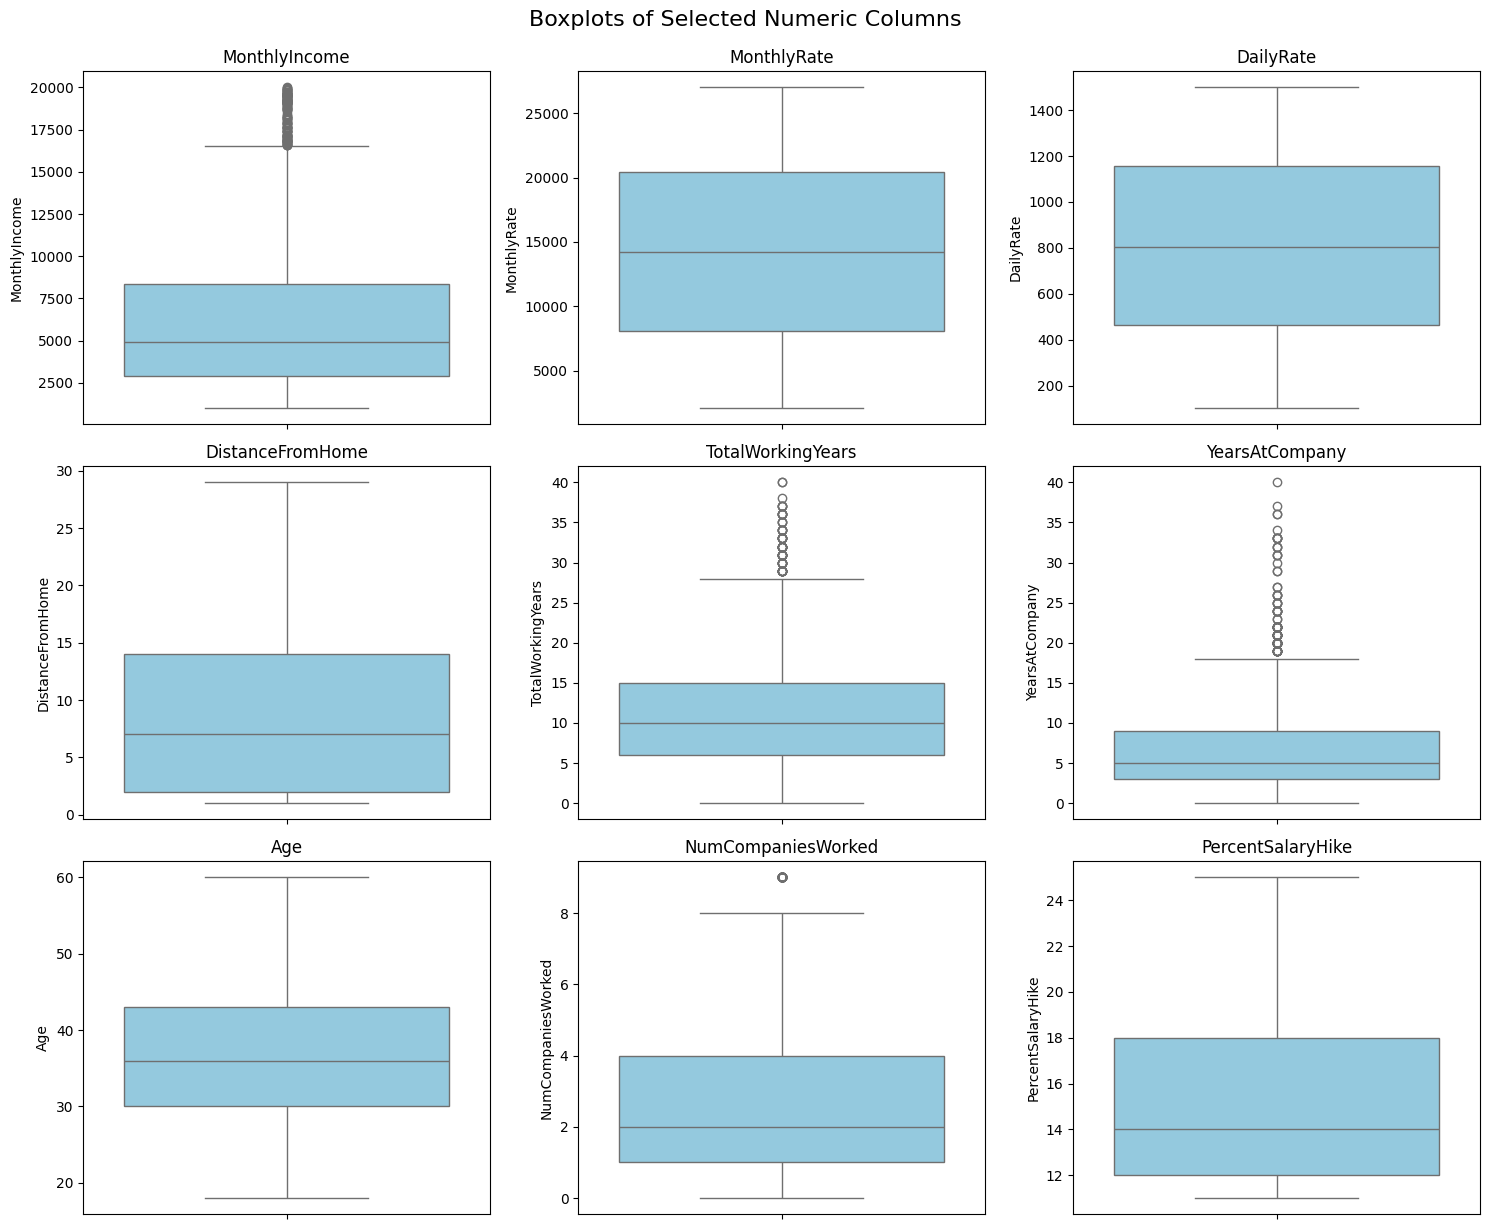

In [6]:
# List of columns to visualize
columns_to_plot = [
    'MonthlyIncome', 'MonthlyRate', 'DailyRate',
    'DistanceFromHome', 'TotalWorkingYears',
    'YearsAtCompany', 'Age', 'NumCompaniesWorked', 'PercentSalaryHike'
]

# Set up the plotting grid
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # 3x3 grid
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)
    plt.tight_layout()

plt.suptitle('Boxplots of Selected Numeric Columns', fontsize=16, y=1.02)
plt.show()

2️⃣ **Outlier Analysis from Boxplots**
Here's a breakdown of outliers observed in each variable:
- **MonthlyIncome**: Shows a significant number of high-value outliers. The main distribution is concentrated at lower income levels, with a long tail towards higher incomes. These likely represent high-earning individuals.
- **MonthlyRate**: No outliers are visible beyond the whiskers. The data seems fairly symmetrically distributed within its range.
- **DailyRate**: No outliers are visible.
- **DistanceFromHome**: No outliers are visible.
- **TotalWorkingYears**: Several high-value outliers are present, indicating individuals with exceptionally long career spans compared to the majority.
- **YearsAtCompany**: Numerous high-value outliers are visible. This suggests some employees have a much longer tenure at the company than the typical employee.
- **Age**: No outliers are visible.
- **NumCompaniesWorked**: A few high-value outliers are present, indicating some individuals have worked at a considerably larger number of companies.
- **PercentSalaryHike**: No outliers are visible.

Variables with **notable outliers**: `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `NumCompaniesWorked`

3️⃣ **Handling Strategy**
Considerations for Handling Outliers:
- **Nature of Outliers**: The outliers in `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, and `NumCompaniesWorked` appear to be genuine high values rather than data entry errors (e.g., an age of 200 would be an error, but 40 years at a company is possible). These could represent senior employees, long-tenured staff, or individuals with diverse career paths.
- **Dataset Size**: While not huge, 1000+ rows is a reasonable size. Each data point contributes to understanding the overall distribution. Removing outliers, especially if they are represent valid observations, means losing potentially valuable information about the extremes of your dataset.

Handling: **Leave outliers as is** to preserves all data, reflects reality but cautious with extreme values that may skew analysis. For supervised ML modeling, other handling method like Capping or Transform data will be considered if it improves model performances.

### Univariate Analysis

#### Numerical Features

Based on the Variable Descripton, numerical features (columns with continous value) consists of `Age`, `DailyRate`, `DistanceFromHome`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`, `NumCompaniesWorked`, `PercentSalaryHike`, `StandardHours`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager`

In [7]:
numerical_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
    ]

df_numerical = df_cleaned[numerical_features].copy()
print(df_numerical.describe())

               Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1058.000000  1058.000000       1058.000000  1058.000000    1058.000000   
mean     37.055766   809.542533          8.978261    65.643667    6625.945180   
std       9.410421   408.478049          8.040608    20.324861    4837.695042   
min      18.000000   102.000000          1.000000    30.000000    1009.000000   
25%      30.000000   465.250000          2.000000    48.000000    2900.250000   
50%      36.000000   817.500000          7.000000    65.000000    4903.500000   
75%      43.000000  1168.500000         13.000000    83.000000    8736.500000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
count   1058.000000         1058.000000        1058.000000         1058.0   
mean   14267.281664            2.706994          15.155955           80.0   
std     7048.077305            2.523526

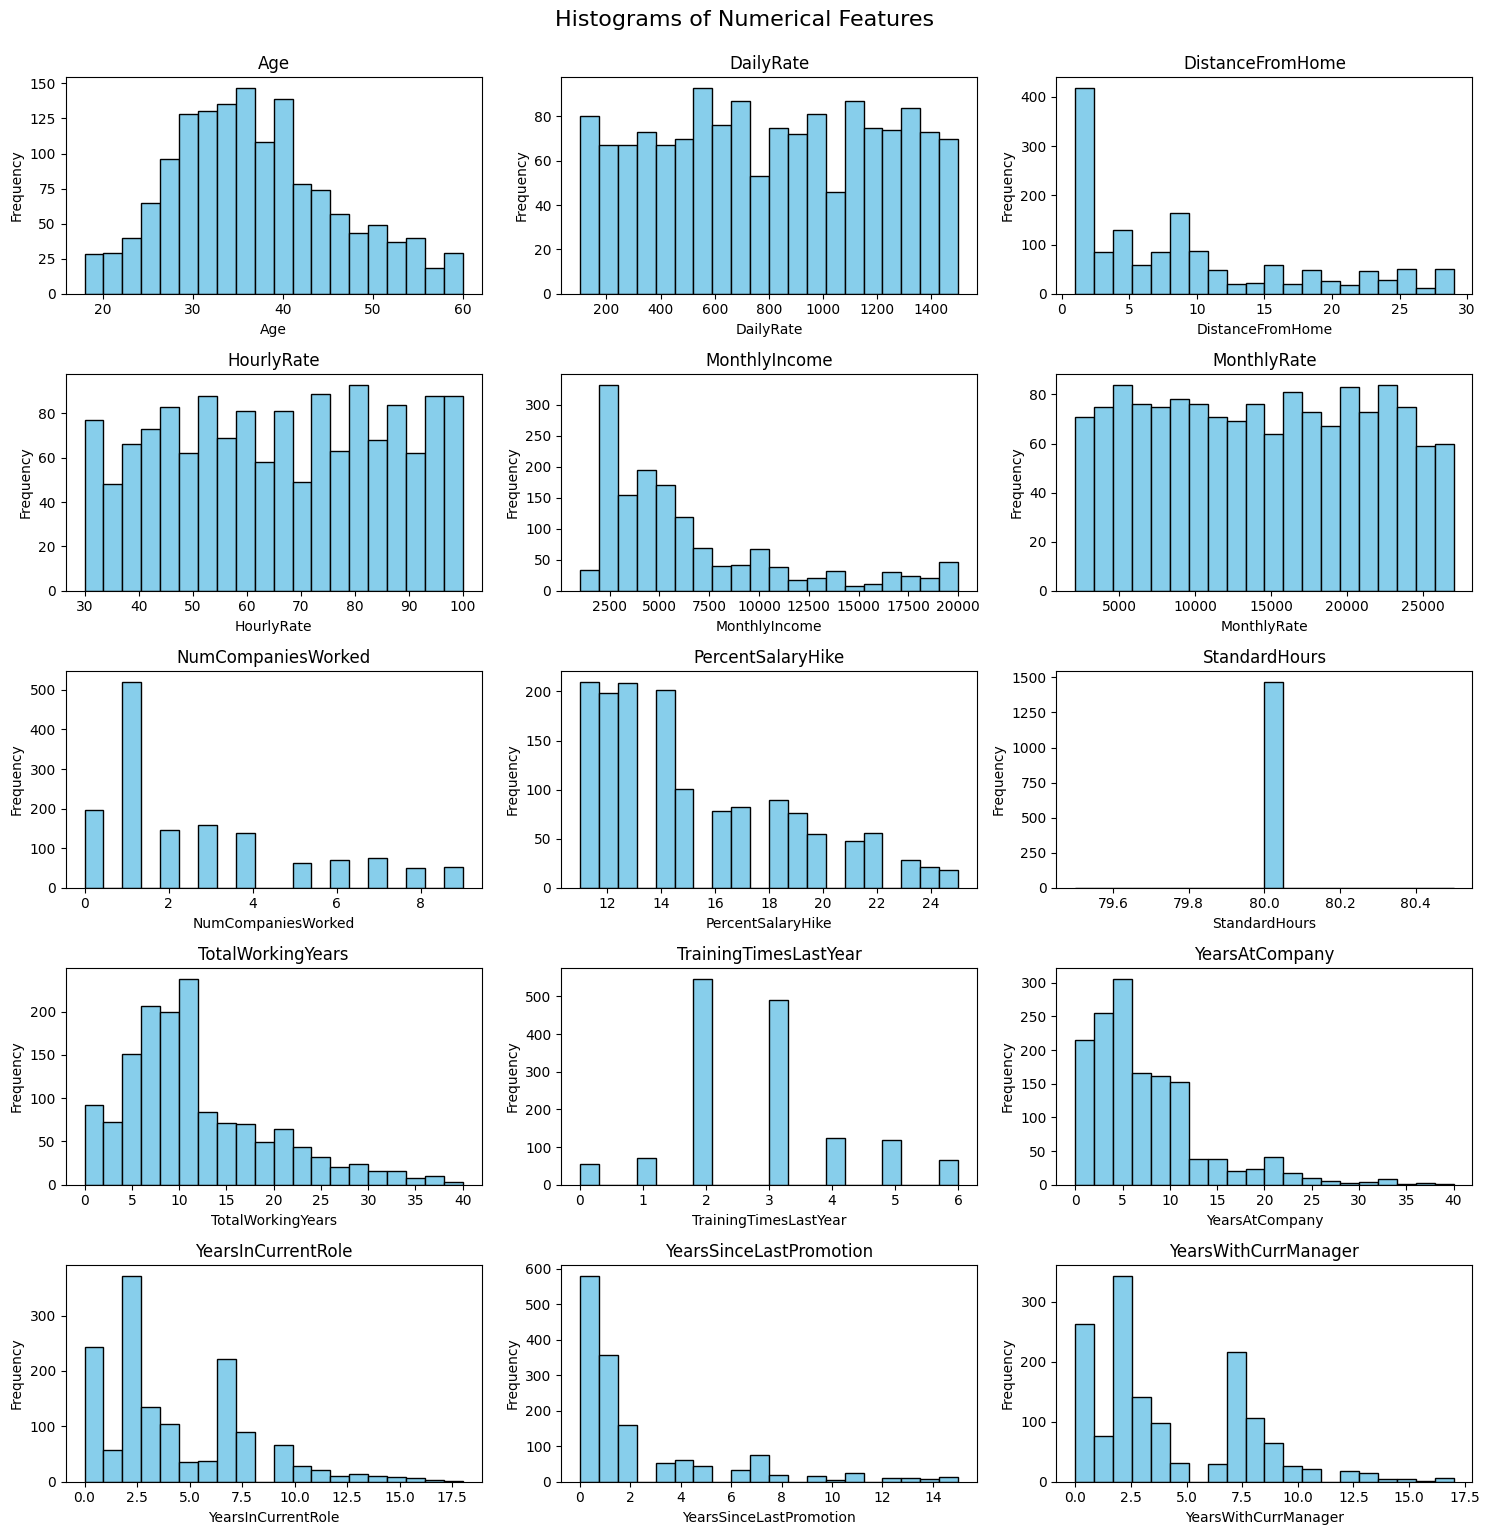

In [8]:
# List of numerical features
numerical_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Set up the grid
num_cols = 3
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 3))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()


Insights:
- `Age`: The employee age distribution is similar to normal distribution, centering around the mid-30s (average 36.9 years). Most employees fall between 30 and 43 years old.
- `DailyRate`: Daily rates are widely spread without a single strong central tendency, as shown by a relatively flat histogram. The average daily rate is around 802, which is also the median. This means number of employees distribute evenly in every range of DailyRate.
- `DistanceFromHome`: Most employees live close to work, with the distribution heavily skewed towards shorter distances (median 7 km). A smaller number of employees commute from much farther away.
- `HourlyRate`: Similar to daily rates, hourly rates are spread out across the range without a single dominant value. The average hourly rate is 65.89.
- `MonthlyIncome`: Monthly income is strongly right-skewed, indicating a majority of employees earn on the lower side (median 4919). A few high earners pull the average up to 6503.
- `MonthlyRate`: The distribution of monthly rates appears fairly uniform across its range. The average (14313) and median (14235) are quite close. The distribution difference between income and rate shows difference definition between Income and Rate
- `NumCompaniesWorked`: Most employees have worked for a small number of companies, typically 1 or 2, creating a right-skewed distribution. The average is 2.69 companies.
- `PercentSalaryHike`: Salary hikes are generally modest, with most employees receiving salary hikes from last year between 11% and 14%, leading to a right-skewed distribution. The average hike is 15.21%.
- `StandardHours`: This is a constant value for all employees, fixed at 80 hours. Thus, it shows no variability in the dataset.
- `TotalWorkingYears`: The workforce has a notable number of employees with fewer total working years (median 10 years), creating a right-skewed distribution. Experience ranges up to 40 years. This shows that many people are in earlier stages of their career progression.
- `TrainingTimesLastYear`: Employees most commonly undertook 2 or 3 training sessions last year. The data shows distinct peaks at these values rather than a smooth curve.
- `YearsAtCompany`: A majority of employees have a shorter tenure at the company (median 5 years), resulting in a strongly right-skewed distribution. Some have been with the company for up to 40 years.
- `YearsInCurrentRole`: Employees are generally newer in their current roles, with a median of 3 years. The distribution is strongly right-skewed.
- `YearsSinceLastPromotion`: Most employees have been promoted relatively recently, with a median of just 1 year since their last promotion. This distribution is heavily right-skewed with many at 0 years.
- `YearsWithCurrManager`: Tenure with the current manager is also right-skewed, with a median of 3 years. This indicates many employees have relatively new managers or change managers somewhat frequently.

#### Categorical Features

In [9]:
df_categorical = df_cleaned.drop(numerical_features, axis=1)
df_categorical = df_categorical.drop("EmployeeId", axis=1)
df_categorical = df_categorical.drop("EmployeeCount", axis=1)
df_categorical = df_categorical.drop("Over18", axis=1)


In [10]:
# Map value of categorical columns with numerical dtype
df_categorical['Attrition'] = df_categorical['Attrition'].map({0: 'No', 1: 'Yes'})

df_categorical['Education'] = df_categorical['Education'].map({
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
    })

df_categorical['EnvironmentSatisfaction'] = df_categorical['EnvironmentSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    })

df_categorical['JobInvolvement'] = df_categorical['JobInvolvement'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    })

df_categorical['JobLevel'] = df_categorical['JobLevel'].map({
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3',
    4: 'Level 4',
    5: 'Level 5'
    })

df_categorical['JobSatisfaction'] = df_categorical['JobSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    })

df_categorical['PerformanceRating'] = df_categorical['PerformanceRating'].map({
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
    })

df_categorical['RelationshipSatisfaction'] = df_categorical['RelationshipSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

df_categorical['StockOptionLevel'] = df_categorical['StockOptionLevel'].map({
    0: 'Level 0',
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3',
    })

df_categorical['WorkLifeBalance'] = df_categorical['WorkLifeBalance'].map({
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
})

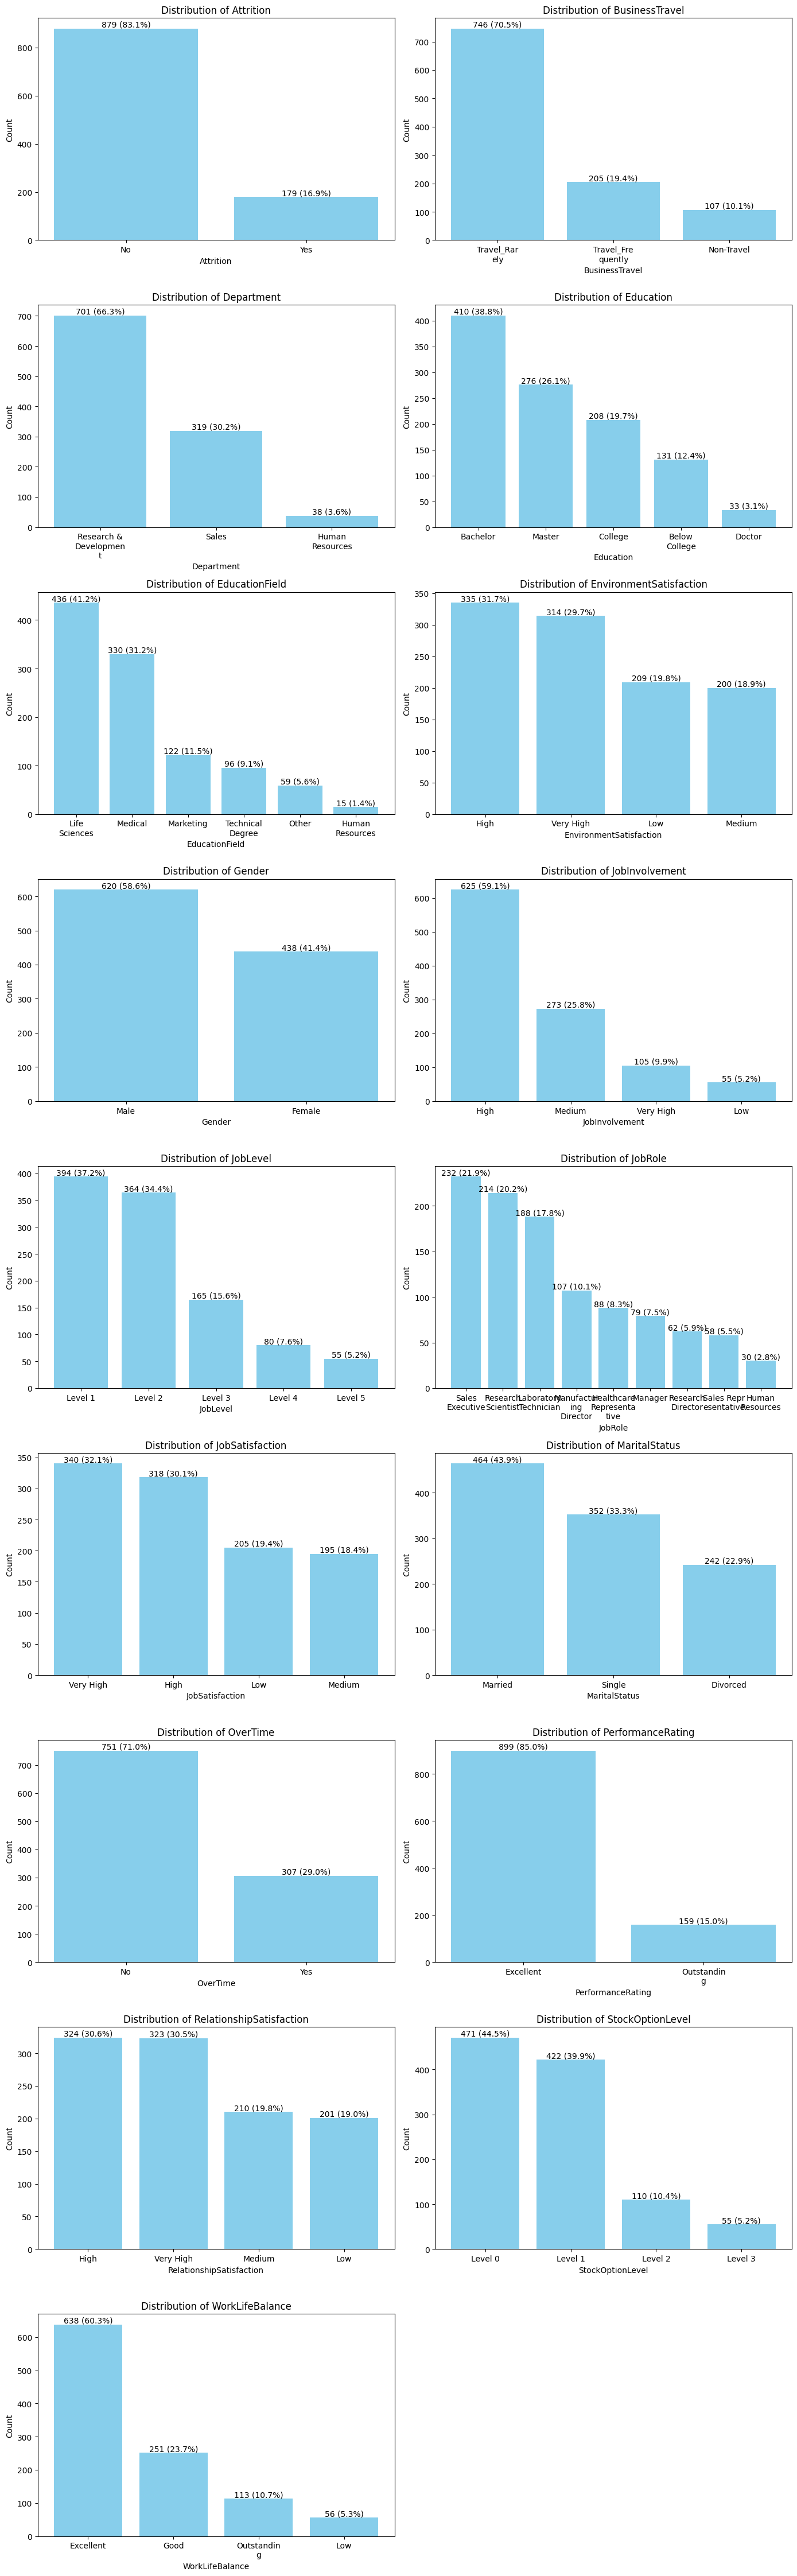

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import textwrap

# Define helper to wrap long labels
def wrap_labels(labels, width=10):
    return ['\n'.join(textwrap.wrap(str(label), width)) for label in labels]

# Number of categorical columns
n_cols = len(df_categorical.columns)
n_rows = math.ceil(n_cols / 2)

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df_categorical.columns):
    ax = axes[i]
    value_counts = df_categorical[col].value_counts()
    total = value_counts.sum()

    # Wrap long labels
    wrapped_labels = wrap_labels(value_counts.index)

    # Bar plot
    bars = ax.bar(wrapped_labels, value_counts.values, color='skyblue')

    # Set titles and labels
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Horizontal x-ticks
    ax.tick_params(axis='x', rotation=0)

    # Add data labels: Value (Percentage%)
    for bar, count in zip(bars, value_counts.values):
        percent = (count / total) * 100
        label = f"{count} ({percent:.1f}%)"
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                label, ha='center', va='bottom')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insights:
- `Attrition`: A significant majority of employees (83.08%) are currently not attrited, while 16.92% have left the company. Understanding the drivers for this 17% attrition rate is crucial for retention strategies.
- `BusinessTravel`: Most employees (70.51%) travel rarely for business, suggesting that frequent travel is not a standard requirement for the bulk of the roles. Only a smaller portion (19.38%) travels frequently or not at all (10.11%).
- `Department`: The Research & Development department is the largest, employing 66.26% of the workforce, indicating a strong focus on innovation. Human Resources is the smallest department with only 3.59% of employees.
- `Education`: A large portion of the workforce holds a Bachelor's degree (38.75%) or a Master's degree (26.09%). This suggests a well-educated employee base with advanced qualifications being common.
- `EducationField`: Life Sciences (41.21%) and Medical (31.19%) are the most common fields of education. This points towards a specialization in these areas within the company's talent pool.
- `EnvironmentSatisfaction`: A majority of employees report High (31.66%) or Very High (29.68%) environment satisfaction. This indicates a generally positive perception of the work environment by over 60% of staff.
- `Gender`: The workforce comprises more Males (58.60%) than Females (41.40%). This shows a gender imbalance that HR might want to address for diversity initiatives.
- `JobInvolvement`: Most employees show High (59.07%) or Medium (25.80%) job involvement. This suggests a generally engaged workforce, with very few reporting Low involvement (5.20%).
- `JobLevel`: The most common job levels are Level 1 (37.24%) and Level 2 (34.40%), indicating a significant portion of the workforce is in entry to mid-level positions. Higher job levels (4 and 5) are much less populated.
- `JobRole`: Sales Executive (21.93%), Research Scientist (20.23%), and Laboratory Technician (17.77%) are the most common job roles. This highlights key operational areas and common career paths within the organization.
- `JobSatisfaction`: The majority of employees report Very High (32.14%) or High (30.06%) job satisfaction. This is a positive indicator for HR, suggesting over 60% of employees are content with their jobs.
- `MaritalStatus`: Married employees make up the largest group (43.86%), followed by Single employees (33.27%). Understanding this demographic can be useful for tailoring benefits and support programs.
- `OverTime`: A notable portion of employees (29.02%) work overtime. This could be an area for HR to investigate for potential burnout or workload distribution issues, as over 70% do not work overtime.
- `PerformanceRating`: The vast majority of employees (84.97%) receive an 'Excellent' performance rating. This suggests either a high-performing workforce or a lenient rating system.
- `RelationshipSatisfaction`: Employees generally report good relationship satisfaction, with High (30.62%) and Very High (30.53%) ratings being the most common. This indicates positive interpersonal dynamics for over 60% of staff.
- `StockOptionLevel`: A large number of employees are at Level 0 (44.52%) or Level 1 (39.89%) for stock options. This suggests that lower stock option levels are common, potentially for non-managerial roles.
- `WorkLifeBalance`: Most employees rate their work-life balance as Excellent (60.30%). This is a strong positive for the company culture, though a small percentage (5.29%) still find it Low.

### Multivariate Analysis

#### Numerical Features

In [12]:
df_numerical['Attrition_num'] = df_cleaned['Attrition']
df_numerical = df_numerical.drop("StandardHours", axis=1)

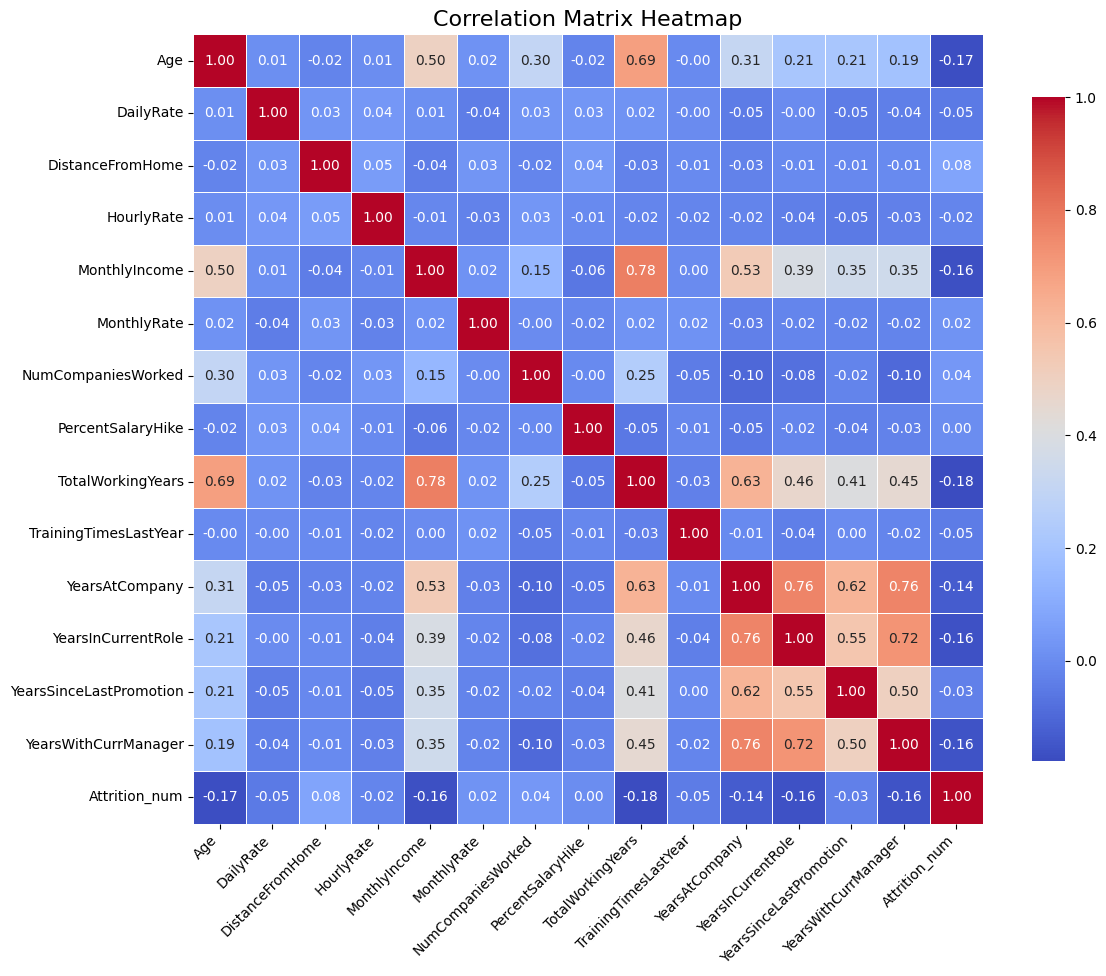

In [13]:
# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Set the plot size
plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(corr_matrix,
            annot=True,         # show correlation values
            fmt=".2f",          # format to 2 decimal places
            cmap='coolwarm',    # color map
            square=True,        # square cells
            cbar_kws={"shrink": 0.8},  # color bar size
            linewidths=0.5)     # add lines between squares

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insights based on Correlation Matrix:

**Strong Connections Between Employee Details (Potential Redundancies)**
- An employee's `Age` and their `TotalWorkingYears` often go up together (correlation 0.69), which makes sense as older people usually have worked longer. Similarly, `MonthlyIncome` tends to be higher for those with more `TotalWorkingYears` (0.78) and older `Age` (0.50), suggesting these factors are closely linked in determining pay.
- Several features about an employee's time at the company are strongly related, pointing to potential information overlap. For instance, `YearsAtCompany` has strong positive links with `YearsInCurrentRole` (0.76) and `YearsWithCurrManager` (0.76), meaning the longer someone is at the company, the longer they also tend to be in their role and with their manager.

**How These Details Relate to Employees Leaving (Attrition)**
- Certain factors seem to make employees more likely to stay. Older employees (`Age` -0.17), those with higher `MonthlyIncome` (-0.16), more `TotalWorkingYears` (-0.18), more `YearsAtCompany` (-0.14), more `YearsInCurrentRole` (-0.16), and more `YearsWithCurrManager` (-0.16) show a lower tendency to leave.
- On the other hand, `DistanceFromHome` has a slight positive connection with leaving (0.08), suggesting employees living further away might be a little more prone to attrition. Most other numerical details, like `DailyRate` or `HourlyRate`, show very weak connections to attrition from this matrix alone.

**What This Means for HR**
- The strong links between age, total working years, and monthly income are quite expected in most organizations. When trying to understand employee behavior, HR might find that some of these (like `TotalWorkingYears` and `MonthlyIncome`) provide very similar information, so focusing on one might be enough for some analyses.
- To reduce good employees leaving, it seems important to focus on factors that encourage loyalty over time. The data suggests that as employees build more experience, higher income, and longer tenures within the company and with their managers, they are less likely to resign.


#### Categorical Features

In [14]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Build pairwise Cramér's V matrix
cols = df_categorical.columns
cramer_matrix = pd.DataFrame(index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            cramer_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

cramer_matrix = cramer_matrix.astype(float)

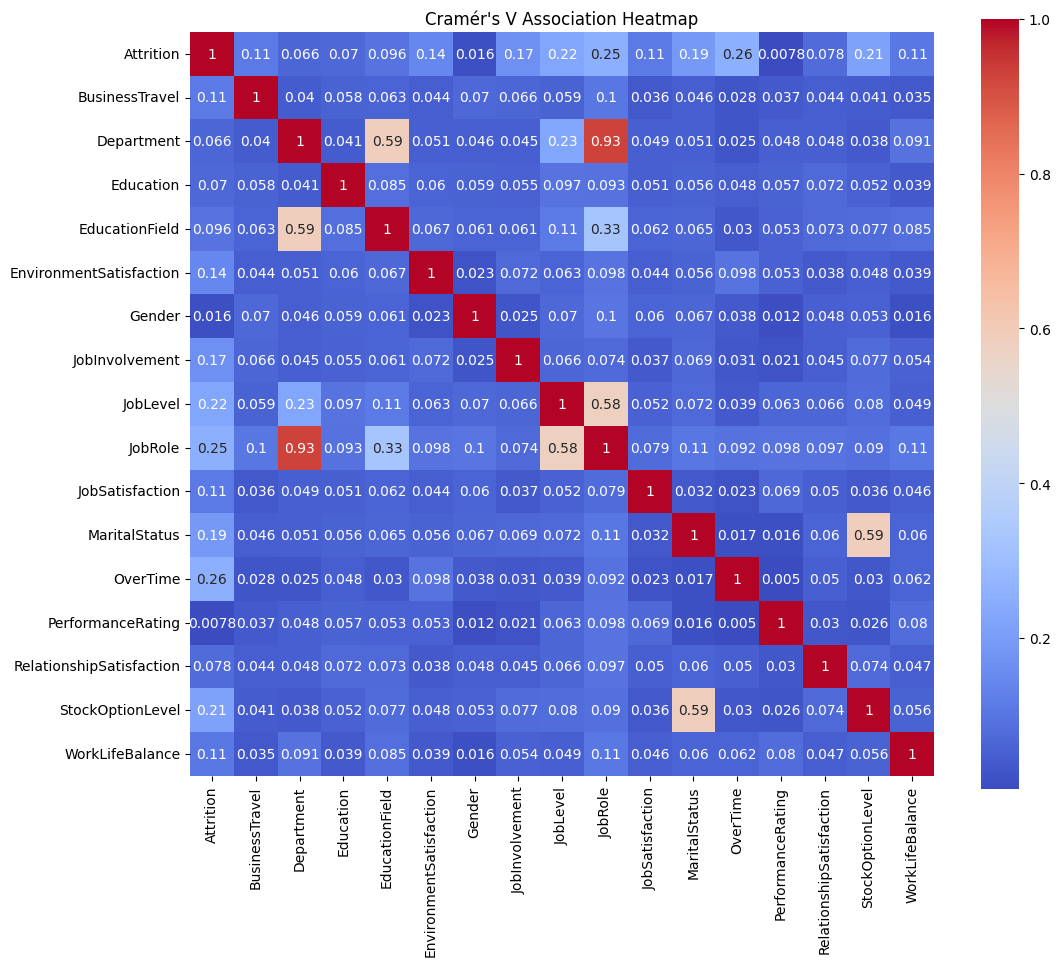

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Cramér's V Association Heatmap")
plt.show()

Insights based on Cramer's V Association Matrix:

**Strong Connections Between Employee Categories (Potential Overlap)**
- An employee's `Department` and their `JobRole` are very strongly linked (value 0.93). This means knowing the department often gives a very good idea of the types of job roles in it, so these two pieces of information are quite similar.
- There's also a fairly strong connection between `Department` and `EducationField` (0.59), suggesting that people with certain educational backgrounds tend to work in specific departments. Similarly, `JobLevel` and `JobRole` (0.58) are quite connected, as specific roles usually correspond to certain levels in the company.
- Interestingly, `MaritalStatus` and `StockOptionLevel` (0.59) have a notable connection, meaning there's some pattern between an employee's marital situation and the level of stock options they have.

**How These Categories Relate to Employees Leaving (Attrition)**
- Whether an employee works `OverTime` (0.26) has a noticeable connection to them leaving. The specific `JobRole` (0.25) and `JobLevel` (0.22) also show a fairly strong link to attrition, suggesting these are important factors.
- `StockOptionLevel` (0.21) and `MaritalStatus` (0.19) also have a moderate connection to an employee leaving. Other things like `JobInvolvement` (0.17) and `EnvironmentSatisfaction` (0.14) show some, but weaker, links.
- Details like an employee's `Gender` (0.02) or their `PerformanceRating` (0.01) have very little connection to whether they leave.

**What This Means for HR**
- When HR looks at employee data, understanding that `Department` and `JobRole` are very similar can simplify things; they might not need to look at both in great detail all the time.
- To understand why employees leave, HR should pay close attention to things like overtime, specific job roles and levels, stock options, and marital status, as these seem to be more connected to attrition than some other categories.

## Analysis of Business Problem 1


> 📊 Business Problem 1: How is the relationship between the variables or factors from the available data and employee attrition?

### Identify Relevant Variables for Analysis
Looking at how strongly different employee details are related to each other helps find any information that might be repetitive. This way, the focus can be on unique details, avoiding looking at the same underlying factor multiple times.

#### Numerical Features

`Attrition_num`

In [16]:
selected_feature = 'Attrition_num'

# Compute correlation
correlation = df_numerical.corr()[selected_feature].drop(selected_feature)

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,Attrition_num
TotalWorkingYears,0.177137
Age,0.172067
MonthlyIncome,0.163600
YearsInCurrentRole,0.158757
YearsWithCurrManager,0.155962
YearsAtCompany,0.135134
DistanceFromHome,0.078074
DailyRate,0.051992
TrainingTimesLastYear,0.047859
NumCompaniesWorked,0.037429


`TotalWorkingYears`

In [17]:
# Compute correlation
selected_feature = 'TotalWorkingYears'
correlation = df_numerical.corr()[selected_feature].drop(selected_feature)

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,TotalWorkingYears
MonthlyIncome,0.778177
Age,0.690428
YearsAtCompany,0.627359
YearsInCurrentRole,0.463548
YearsWithCurrManager,0.450984
YearsSinceLastPromotion,0.405437
NumCompaniesWorked,0.246417
Attrition_num,0.177137
PercentSalaryHike,0.053250
TrainingTimesLastYear,0.032314


`TotalWorkingYears` shows a moderate positive correlation with `Attrition` (0.18), making it a potentially useful predictor. However, it has very high correlations with `MonthlyIncome` (0.78), `Age` (0.69), and `YearsAtCompany` (0.63), indicating redundancy if those features are also used. `TotalWorkingYears` is **included** for its signal value in Attrition analysis; otherwise, including all may introduce multicollinearity, so only the most interpretable or strongest predictor among them should be chosen.

In the context of HR, `TotalWorkingYears` encapsulates a broader picture of an employee's career progression, often influencing their income level, tenure, and advancement within the company. Therefore, features like `MonthlyIncome`, `Age`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager`, and `YearsSinceLastPromotion` are excluded to avoid multicollinearity, as they are highly correlated with and partially derived from overall work experience.

`DistanceFromHome`

In [18]:
# Compute correlation
correlation = df_numerical.corr()['DistanceFromHome'].drop('DistanceFromHome')

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,DistanceFromHome
Attrition_num,0.078074
HourlyRate,0.048494
MonthlyIncome,0.042127
PercentSalaryHike,0.041835
YearsAtCompany,0.028687
MonthlyRate,0.027495
DailyRate,0.027120
TotalWorkingYears,0.025465
Age,0.022753
NumCompaniesWorked,0.018545


The feature `DistanceFromHome` shows very weak correlations with all other numerical features, including a low correlation with `Attrition_num` (0.078), suggesting it provides unique information not captured by other variables. Its lack of redundancy indicates it can contribute distinct insights, possibly related to work-life balance or commute-related stress affecting attrition. Therefore, `DistanceFromHome` should be retained for analysis, as it may capture behavioral or contextual factors influencing employee turnover.

`DailyRate`

In [19]:
# Compute correlation
correlation = df_numerical.corr()['DailyRate'].drop('DailyRate')

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,DailyRate
Attrition_num,0.051992
YearsSinceLastPromotion,0.047469
YearsAtCompany,0.047141
MonthlyRate,0.040267
HourlyRate,0.038572
YearsWithCurrManager,0.038338
PercentSalaryHike,0.031179
NumCompaniesWorked,0.028158
DistanceFromHome,0.027120
TotalWorkingYears,0.024266


The correlation between `DailyRate` and `Attrition` is very weak (0.0519), and its correlations with other features are also minimal, indicating it does not contribute meaningful predictive value or redundancy. Contextually, standardized pay rates like `DailyRate` do not reflect the broader compensation experience (e.g., bonuses, promotions, or perceived fairness), which are more impactful in driving attrition. Given both its low correlation and limited contextual significance, `DailyRate` and similar metric namely `MonthlyRate` and `HourlyRate` are not included in attrition analysis.

`TrainingTimesLastYear`

In [20]:
# Compute correlation
correlation = df_numerical.corr()['TrainingTimesLastYear'].drop('TrainingTimesLastYear')

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,TrainingTimesLastYear
Attrition_num,0.047859
NumCompaniesWorked,0.047052
YearsInCurrentRole,0.035002
TotalWorkingYears,0.032314
YearsWithCurrManager,0.019609
HourlyRate,0.017006
MonthlyRate,0.016398
PercentSalaryHike,0.014550
YearsAtCompany,0.005342
DistanceFromHome,0.005176


The correlation results show that `TrainingTimesLastYear` has very weak relationships with all other numerical features, including `Attrition_num`, indicating minimal linear influence on attrition or overlap with other factors. This suggests that training frequency in the last year may vary independently of employee tenure, income, or performance-related metrics. While it may not offer strong predictive power alone, it is **included** as a complementary variable in models—especially if categorical interactions (e.g., by department or role) are later considered.

`NumCompaniesWorked`

In [21]:
# Compute correlation
correlation = df_numerical.corr()['NumCompaniesWorked'].drop('NumCompaniesWorked')

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,NumCompaniesWorked
Age,0.303624
TotalWorkingYears,0.246417
MonthlyIncome,0.147337
YearsAtCompany,0.103149
YearsWithCurrManager,0.096537
YearsInCurrentRole,0.077741
TrainingTimesLastYear,0.047052
Attrition_num,0.037429
HourlyRate,0.030150
DailyRate,0.028158


Although `NumCompaniesWorked` has a low direct correlation with `Attrition` (0.0374), it captures a unique aspect of an employee’s career history—namely, job mobility—that is not fully reflected by `TotalWorkingYears` or `Age`. Its moderate correlation with experience-related features suggests some overlap, but including it can provide additional context on an employee’s stability or willingness to change jobs, which may be relevant in understanding attrition behavior. Therefore, including `NumCompaniesWorked` alongside other features can enrich the analysis by adding a different perspective on employee turnover risk.

`YearsSinceLastPromotion`

In [22]:
# Compute correlation
correlation = df_numerical.corr()['YearsSinceLastPromotion'].drop('YearsSinceLastPromotion')

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,YearsSinceLastPromotion
YearsAtCompany,0.622744
YearsInCurrentRole,0.552759
YearsWithCurrManager,0.499539
TotalWorkingYears,0.405437
MonthlyIncome,0.354188
Age,0.211967
HourlyRate,0.049503
DailyRate,0.047469
PercentSalaryHike,0.036548
Attrition_num,0.031944


`YearsSinceLastPromotion` shows a low correlation with `Attrition` (0.0319), suggesting it is not a strong standalone predictor of whether an employee will leave. It has moderate to strong correlations with experience-related features such as `YearsAtCompany` (0.62), `YearsInCurrentRole` (0.55), and `YearsWithCurrManager` (0.50), indicating potential redundancy in capturing tenure-related information. Given its contextual relevance in HR—where lack of promotion may indicate career stagnation—it is worth to be **included** for its interpretive value

`PercentSalaryHike`

In [23]:
# Compute correlation
correlation = df_numerical.corr()['PercentSalaryHike'].drop('PercentSalaryHike')

# Get absolute correlation values and sort
correlation = correlation.abs().sort_values(ascending=False)

# Display the result
correlation

,PercentSalaryHike
MonthlyIncome,0.060257
YearsAtCompany,0.053862
TotalWorkingYears,0.053250
DistanceFromHome,0.041835
YearsSinceLastPromotion,0.036548
DailyRate,0.031179
YearsWithCurrManager,0.029423
Age,0.024856
YearsInCurrentRole,0.018894
MonthlyRate,0.015426


`PercentSalaryHike` has a very low correlation with Attrition (0.0049), indicating it does not significantly explain why employees stay or leave the company. It also shows weak correlations with other numerical features, meaning it is not redundant but also not strongly associated with broader employee experience or compensation patterns. Given its minimal predictive power, this is `excluded` from attrition analysis.

Relevant features from numerical features for attrition analysis:
- `TotalWorkingYears`
- `DistanceFromHome`
- `TrainingTimesLastYear`
- `NumCompaniesWorked`
- `YearsSinceLastPromotion`

#### Categorical Features

`Attrition`

In [24]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'Attrition'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: Attrition
Categories: ['Yes' 'No']
Sorted Cramér's V values for 'Attrition':
OverTime                    0.255856
JobRole                     0.250508
JobLevel                    0.224914
StockOptionLevel            0.212667
MaritalStatus               0.188572
JobInvolvement              0.165855
EnvironmentSatisfaction     0.143808
BusinessTravel              0.112555
JobSatisfaction             0.111544
WorkLifeBalance             0.106969
EducationField              0.096300
RelationshipSatisfaction    0.077840
Education                   0.069557
Department                  0.066133
Gender                      0.015887
PerformanceRating           0.007755
Name: Attrition, dtype: float64


`OverTime`

In [25]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'OverTime'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: OverTime
Categories: ['No' 'Yes']
Sorted Cramér's V values for 'OverTime':
Attrition                   0.255856
EnvironmentSatisfaction     0.098147
JobRole                     0.091843
WorkLifeBalance             0.061565
RelationshipSatisfaction    0.050045
Education                   0.047579
JobLevel                    0.038832
Gender                      0.037655
JobInvolvement              0.031269
StockOptionLevel            0.030038
EducationField              0.029951
BusinessTravel              0.028172
Department                  0.024810
JobSatisfaction             0.023077
MaritalStatus               0.016620
PerformanceRating           0.005029
Name: OverTime, dtype: float64


`OverTime` shows the strongest Cramer's V correlation with Attrition (0.2559), suggesting that employees who work overtime are more likely to leave, possibly due to stress or poor work-life balance. Its correlations with other features are relatively low, indicating that it is not redundant and captures a unique aspect of the work experience. Given both its statistical relevance and contextual importance in human resource management, `OverTime` is included in the analysis of employee attrition.

`JobRole`

In [26]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'JobRole'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: JobRole
Categories: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Human Resources' 'Sales Representative']
Sorted Cramér's V values for 'JobRole':
Department                  0.928761
JobLevel                    0.576371
EducationField              0.326115
Attrition                   0.250508
WorkLifeBalance             0.108958
MaritalStatus               0.105260
BusinessTravel              0.103702
Gender                      0.099761
PerformanceRating           0.098251
EnvironmentSatisfaction     0.097754
RelationshipSatisfaction    0.096516
Education                   0.092743
OverTime                    0.091843
StockOptionLevel            0.089572
JobSatisfaction             0.078786
JobInvolvement              0.073975
Name: JobRole, dtype: float64


`JobRole` shows a strong correlation with `Attrition` (0.2505), indicating its relevance in predicting turnover, as different roles may involve varying levels of stress, growth opportunities, or compensation. However, it is highly redundant with `Department` (0.9288) and significantly correlated with `JobLevel` (0.5764), suggesting overlapping information about organizational structure and hierarchy. Given its stronger correlation with Attrition and richer role-specific insights, `JobRole` is included in the analysis, while excluding both `Department` and `JobLevel` to reduce redundancy.

`StockOptionLevel`

In [27]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'StockOptionLevel'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: StockOptionLevel
Categories: ['Level 0' 'Level 3' 'Level 1' 'Level 2']
Sorted Cramér's V values for 'StockOptionLevel':
MaritalStatus               0.586884
Attrition                   0.212667
JobRole                     0.089572
JobLevel                    0.079808
EducationField              0.077183
JobInvolvement              0.076970
RelationshipSatisfaction    0.073891
WorkLifeBalance             0.055718
Gender                      0.052904
Education                   0.052034
EnvironmentSatisfaction     0.047878
BusinessTravel              0.040590
Department                  0.037606
JobSatisfaction             0.036057
OverTime                    0.030038
PerformanceRating           0.025982
Name: StockOptionLevel, dtype: float64


`StockOptionLevel` has a moderately strong correlation with `Attrition` (0.2127), suggesting it may influence employee decisions to stay or leave, potentially reflecting long-term incentive alignment. However, it shows high redundancy with `MaritalStatus` (0.5869), which could indicate structural or demographic overlap in how stock options are distributed. Given its direct link to financial incentives and relatively low correlation with other key features, `StockOptionLevel` is **included** in attrition analysis, while considering the exclusion of `MaritalStatus` to avoid redundancy.

`JobInvolvement`

In [28]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'JobInvolvement'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: JobInvolvement
Categories: ['Low' 'High' 'Medium' 'Very High']
Sorted Cramér's V values for 'JobInvolvement':
Attrition                   0.165855
StockOptionLevel            0.076970
JobRole                     0.073975
EnvironmentSatisfaction     0.071602
MaritalStatus               0.069402
JobLevel                    0.066290
BusinessTravel              0.066012
EducationField              0.061201
Education                   0.055316
WorkLifeBalance             0.054478
RelationshipSatisfaction    0.045437
Department                  0.044979
JobSatisfaction             0.037191
OverTime                    0.031269
Gender                      0.024702
PerformanceRating           0.021398
Name: JobInvolvement, dtype: float64


`JobInvolvement` shows a moderate correlation with `Attrition` (Cramer's V = 0.166), suggesting that employees who are less involved in their jobs are more likely to leave, which aligns with established HR insights that psychological engagement influences retention. While it has some overlap with features like `StockOptionLevel` (0.077), `JobRole` (0.074), and `EnvironmentSatisfaction` (0.072), the correlation values are relatively low, indicating minimal redundancy and justifying its inclusion. Therefore, `JobInvolvement` is **included** as a distinct and meaningful factor in attrition analysis due to both its correlation strength and theoretical relevance.

`EnvironmentSatisfaction`

In [29]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'EnvironmentSatisfaction'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: EnvironmentSatisfaction
Categories: ['Low' 'High' 'Medium' 'Very High']
Sorted Cramér's V values for 'EnvironmentSatisfaction':
Attrition                   0.143808
OverTime                    0.098147
JobRole                     0.097754
JobInvolvement              0.071602
EducationField              0.067442
JobLevel                    0.062977
Education                   0.060445
MaritalStatus               0.055867
PerformanceRating           0.052503
Department                  0.051300
StockOptionLevel            0.047878
JobSatisfaction             0.044246
BusinessTravel              0.043984
WorkLifeBalance             0.039118
RelationshipSatisfaction    0.038222
Gender                      0.023159
Name: EnvironmentSatisfaction, dtype: float64


`EnvironmentSatisfaction` shows a moderate correlation with `Attrition` (Cramer's V = 0.144), indicating that employees dissatisfied with their work environment are more likely to leave. While it has some correlation with `OverTime` (0.098), `JobRole` (0.098), and `JobInvolvement` (0.072), the overlap is not strong enough to indicate significant redundancy. Given its importance and independent contribution, `EnvironmentSatisfaction` is included in attrition analysis as a relevant predictor of employee turnover behavior.

`BusinessTravel`

In [30]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'BusinessTravel'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: BusinessTravel
Categories: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Sorted Cramér's V values for 'BusinessTravel':
Attrition                   0.112555
JobRole                     0.103702
Gender                      0.070026
JobInvolvement              0.066012
EducationField              0.063166
JobLevel                    0.058835
Education                   0.057765
MaritalStatus               0.045618
RelationshipSatisfaction    0.044049
EnvironmentSatisfaction     0.043984
StockOptionLevel            0.040590
Department                  0.040274
PerformanceRating           0.036996
JobSatisfaction             0.035891
WorkLifeBalance             0.035262
OverTime                    0.028172
Name: BusinessTravel, dtype: float64


`BusinessTravel` has a moderate correlation with `Attrition` (Cramer's V = 0.113), suggesting that travel requirements may influence an employee’s decision to leave, possibly due to work-life balance challenges. Its correlations with other features like `JobRole` (0.104), `Gender` (0.070), and `JobInvolvement` (0.066) are relatively low, indicating limited redundancy and that it captures unique aspects related to travel demands. Therefore, `BusinessTravel` is included in attrition analysis as a meaningful factor, especially when considering the impact of job-related travel on employee retention.

`JobSatisfaction`

In [31]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'JobSatisfaction'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: JobSatisfaction
Categories: ['Medium' 'High' 'Very High' 'Low']
Sorted Cramér's V values for 'JobSatisfaction':
Attrition                   0.111544
JobRole                     0.078786
PerformanceRating           0.069132
EducationField              0.061889
Gender                      0.059792
JobLevel                    0.051966
Education                   0.050977
RelationshipSatisfaction    0.050344
Department                  0.048948
WorkLifeBalance             0.045571
EnvironmentSatisfaction     0.044246
JobInvolvement              0.037191
StockOptionLevel            0.036057
BusinessTravel              0.035891
MaritalStatus               0.032484
OverTime                    0.023077
Name: JobSatisfaction, dtype: float64


`JobSatisfaction` shows a moderate correlation with `Attrition` (Cramer's V = 0.111), indicating it is a relevant factor in predicting employee turnover. Its correlations with other features are generally low to moderate, with the highest being `JobRole` (0.079) and `PerformanceRating` (0.069), suggesting limited redundancy and that it captures a distinct aspect of employee experience. Therefore, `JobSatisfaction` in attrition analysis is included, as it provides valuable insight into employees' contentment at work, which can influence their likelihood to stay or leave.

`WorkLifeBalance`

In [32]:
# Select the feature of interest, e.g., 'Attrition'
selected_feature = 'WorkLifeBalance'

# Category from selected feature
selected_feature_category = df_categorical[selected_feature].unique()
print(f"Selected Feature: {selected_feature}")
print(f"Categories: {selected_feature_category}")

# Sort the correlation values from the selected feature to others, excluding itself
sorted_cramers_v = cramer_matrix[selected_feature].drop(index=selected_feature).sort_values(ascending=False)

# Display the sorted correlations
print(f"Sorted Cramér's V values for '{selected_feature}':")
print(sorted_cramers_v)

Selected Feature: WorkLifeBalance
Categories: ['Low' 'Outstanding' 'Good' 'Excellent']
Sorted Cramér's V values for 'WorkLifeBalance':
JobRole                     0.108958
Attrition                   0.106969
Department                  0.090838
EducationField              0.084671
PerformanceRating           0.079512
OverTime                    0.061565
MaritalStatus               0.059706
StockOptionLevel            0.055718
JobInvolvement              0.054478
JobLevel                    0.048768
RelationshipSatisfaction    0.047050
JobSatisfaction             0.045571
EnvironmentSatisfaction     0.039118
Education                   0.039057
BusinessTravel              0.035262
Gender                      0.016042
Name: WorkLifeBalance, dtype: float64


`WorkLifeBalance` has a moderate correlation with Attrition (Cramer's V = 0.107), indicating it is a meaningful factor in employee turnover analysis. Its correlations with other features are generally low to moderate, with the highest being `JobRole` (0.109) and `Department` (0.091), suggesting it provides unique information and is not highly redundant. Therefore, `WorkLifeBalance` is **included** as it reflects an important aspect of employee well-being that can influence their decision to stay or leave.

Relevant features from categorical features for attrition analysis:
- `OverTime`
- `JobRole`
- `StockOptionLevel`
- `JobInvolvement`
- `EnvironmentSatisfaction`
- `BusinessTravel`
- `JobSatisfaction`
- `WorkLifeBalance`

### Analyze Variable Relationship
Using charts and graphs to see how these important employee details connect with attrition makes it easier to understand the story the data is telling. Visuals can quickly show trends or highlight surprising connections that numbers alone might not.

**Cluster Relevant Features**

Cluster 1: Job Demands & Role
* **Features:** `OverTime`, `JobRole`, `BusinessTravel`
* **Description:** This group describes the specific requirements and nature of an employee's job. It covers what the job asks of them, including their main responsibilities, travel demands, and if they need to work extra hours.

Cluster 2: Employee Satisfaction & Engagement
* **Features:** `EnvironmentSatisfaction`, `JobSatisfaction`, `JobInvolvement`, `WorkLifeBalance`
* **Description:** This cluster focuses on the employee's personal feelings and attitudes about their work. It reflects how happy they are with their job, their surroundings, their personal time, and how engaged they feel.

Cluster 3: Career History & Growth
* **Features:** `TotalWorkingYears`, `NumCompaniesWorked`, `YearsSinceLastPromotion`, `TrainingTimesLastYear`
* **Description:** This group relates to an employee's overall professional journey and development. It includes their total experience, history with other companies, and their recent growth within the current company.

Cluster 4: Financial & External Factors
* **Features:** `StockOptionLevel`, `DistanceFromHome`
* **Description:** This cluster includes an employee's financial stake in the company and personal circumstances outside of work. These factors can influence their long-term commitment and daily convenience.

#### Job Demands & Role

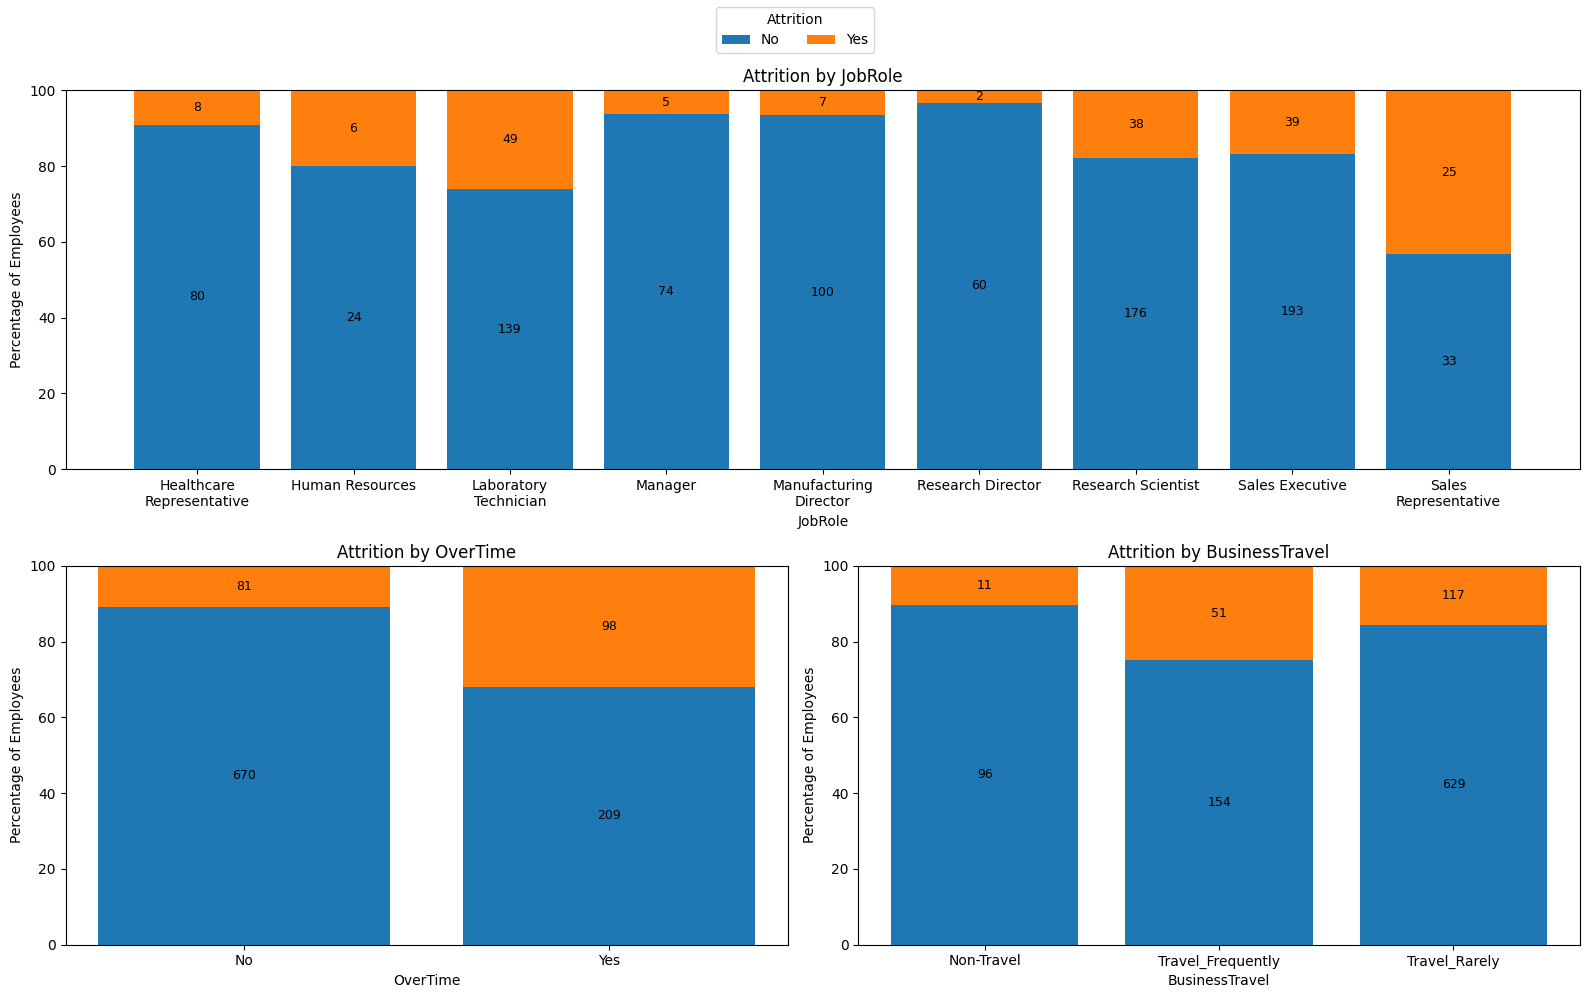

In [33]:
# Define features
features = ['JobRole', 'OverTime', 'BusinessTravel']

# Set up subplots layout: 2 rows (1 column for row 1, 2 columns for row 2)
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2)

# Subplot axes
axes = [
    fig.add_subplot(gs[0, :]),       # JobRole spans full width
    fig.add_subplot(gs[1, 0]),       # OverTime
    fig.add_subplot(gs[1, 1])        # BusinessTravel
]

for i, feature in enumerate(features):
    ax = axes[i]

    # Count and percentage
    count_data = df_categorical.groupby([feature, 'Attrition']).size().unstack(fill_value=0)
    percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

    # Wrap long x-labels (max 2 lines)
    wrapped_labels = ['\n'.join(textwrap.wrap(str(label), width=18)[:2]) for label in count_data.index.tolist()]
    bottoms = [0] * len(wrapped_labels)

    for attrition_status in ['No', 'Yes']:
        values = percent_data[attrition_status].values
        bars = ax.bar(
            wrapped_labels,
            values,
            bottom=bottoms,
            label=attrition_status
        )

        for bar, count in zip(bars, count_data[attrition_status]):
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    str(count),
                    ha='center', va='center', fontsize=9
                )

        bottoms = [b + v for b, v in zip(bottoms, values)]

    ax.set_title(f'Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage of Employees')
    ax.set_ylim(0, 100)

# Add shared legend on top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Attrition', loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insights** from **Job Demands & Role**

`Attrition` by `OverTime`

**Observation**: The chart clearly shows that the proportion of employees leaving (the orange bar) is dramatically higher for the group that works overtime compared to the group that does not. While only a small fraction of non-overtime employees leave, a very significant portion of employees working overtime end up leaving.

**Key Takeaway**: Working overtime is a major driver of employee attrition.

`Attrition` by `BusinessTravel`

**Observation**: The rate of attrition is highest for employees who travel frequently. Those who travel rarely have a moderate attrition rate, while employees who do not travel at all have the lowest rate of leaving.

**Key Takeaway**: The stress and strain of frequent business travel are correlated with a higher likelihood of an employee leaving.

`Attrition` by `JobRole`

**Observation**: Attrition rates vary drastically depending on the specific job role. Roles like Sales Representative show an extremely high attrition rate. Laboratory Technician and Human Resources also have notably high rates. In contrast, senior roles like Research Director, Manufacturing Director, and Manager have very low attrition rates.

**Key Takeaway**: Attrition is not a company-wide, uniform problem; it is highly concentrated in specific jobs.

#### Employee Satisfaction & Engagement

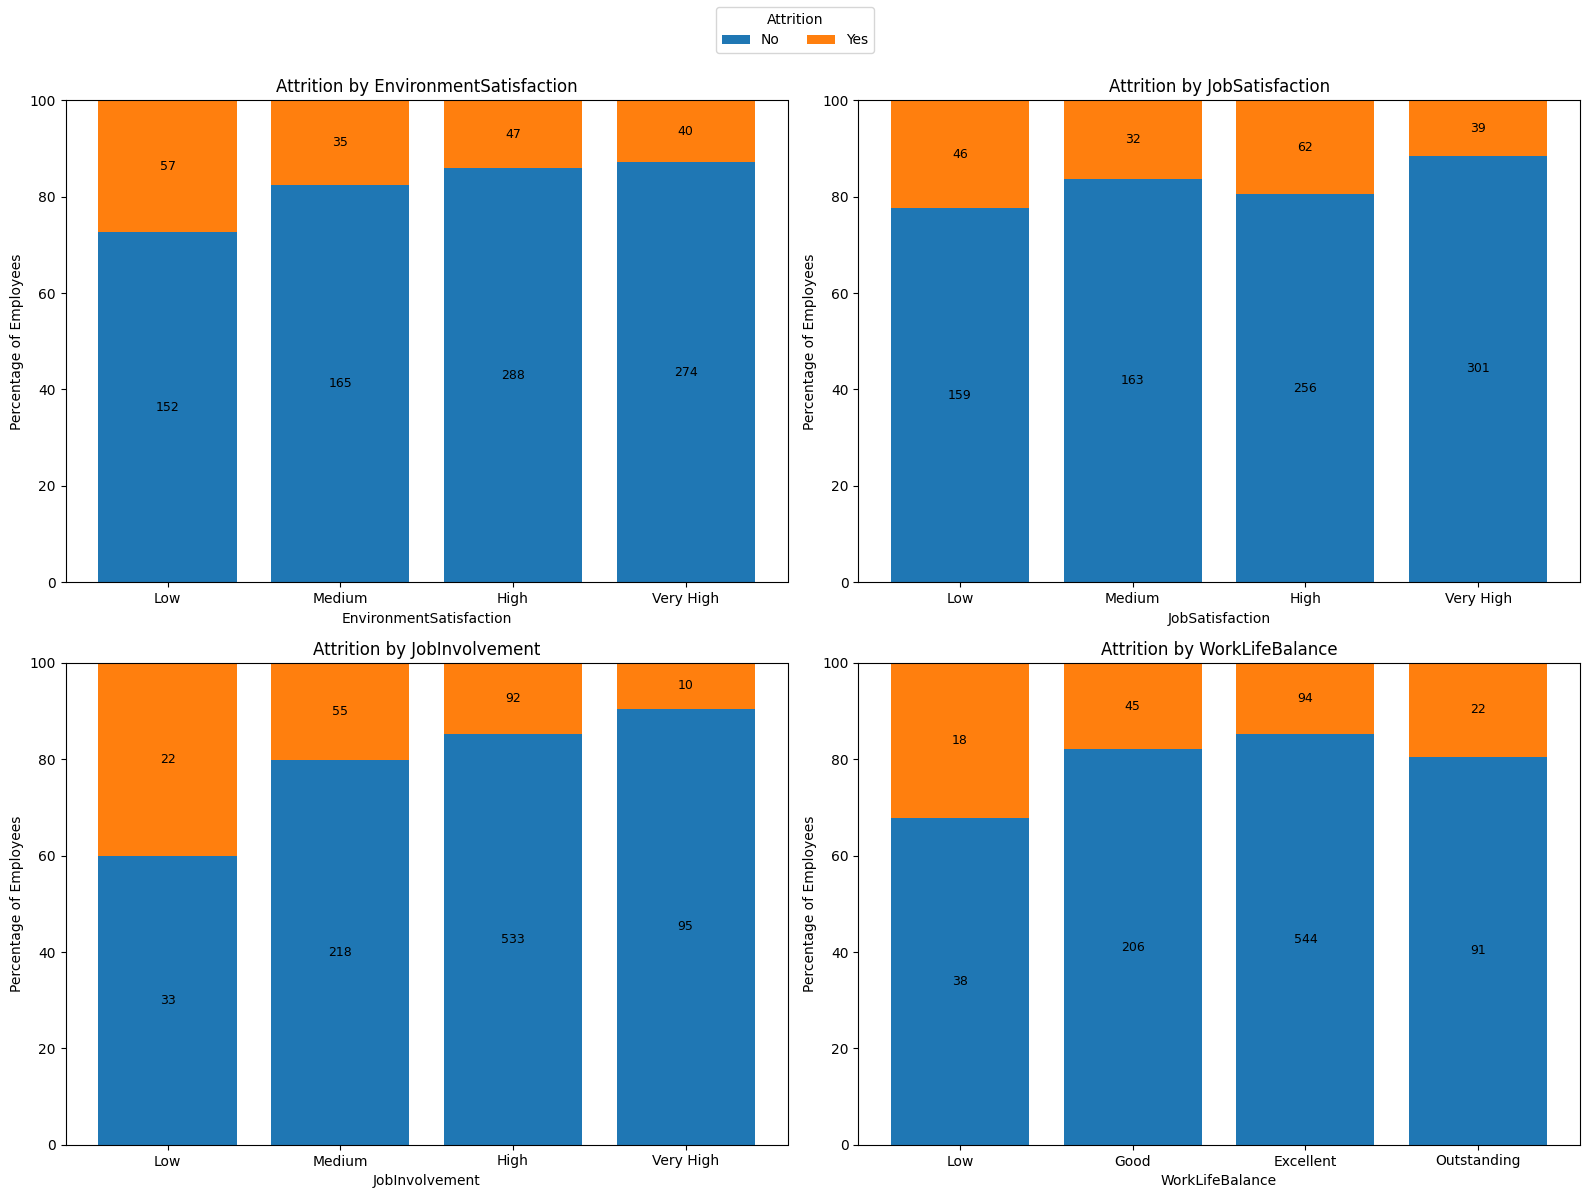

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Define features and their category order
category_orders = {
    'EnvironmentSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'JobSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'JobInvolvement': ['Low', 'Medium', 'High', 'Very High'],
    'WorkLifeBalance': ['Low', 'Good', 'Excellent', 'Outstanding']
}

features = list(category_orders.keys())

# Convert to categorical with specified order
for feature in features:
    df_categorical[feature] = pd.Categorical(df_categorical[feature], categories=category_orders[feature], ordered=True)

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Calculate counts and percentages
    count_data = df_categorical.groupby([feature, 'Attrition'], observed=True).size().unstack(fill_value=0)
    percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

    bottoms = [0] * len(count_data)

    for attrition_status in ['No', 'Yes']:
        values = percent_data[attrition_status].values
        bars = ax.bar(
            count_data.index.tolist(),
            values,
            bottom=bottoms,
            label=attrition_status
        )

        for bar, count in zip(bars, count_data[attrition_status]):
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    str(count),
                    ha='center', va='center', fontsize=9
                )

        bottoms = [b + v for b, v in zip(bottoms, values)]

    ax.set_title(f'Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage of Employees')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=0)

# Shared legend at the top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Attrition', loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insights** from  **Employee Satisfaction & Engagement**

`Attrition` by `EnvironmentSatisfaction`

**Observation**: The chart shows a clear trend: as environment satisfaction decreases, the rate of attrition increases. The "Low" satisfaction group has the highest proportion of employees leaving.

**Key Takeaway**: A poor physical work environment is a significant factor in employees deciding to leave.

`Attrition` by `JobSatisfaction`

**Observation**: Similar to environment satisfaction, there is a strong inverse relationship between job satisfaction and attrition. Employees with "Low" job satisfaction have the highest rate of leaving, and the rate declines as satisfaction improves.

**Key Takeaway**: Unhappy employees are much more likely to resign.

`Attrition` by `JobInvolvement`

**Observation**: The rate of attrition is extremely high for employees with "Low" job involvement. As involvement increases to "High" and "Very High," the percentage of employees leaving drops significantly.

**Key Takeaway**: Disengaged or uninvolved employees are a major flight risk.

`Attrition` by `WorkLifeBalance`

**Observation**: The connection here is very strong. The group with a "Low" work-life balance has a dramatically higher attrition rate than all other groups.

**Key Takeaway**: Employees with a poor work-life balance are highly likely to leave.

#### Career History & Growth

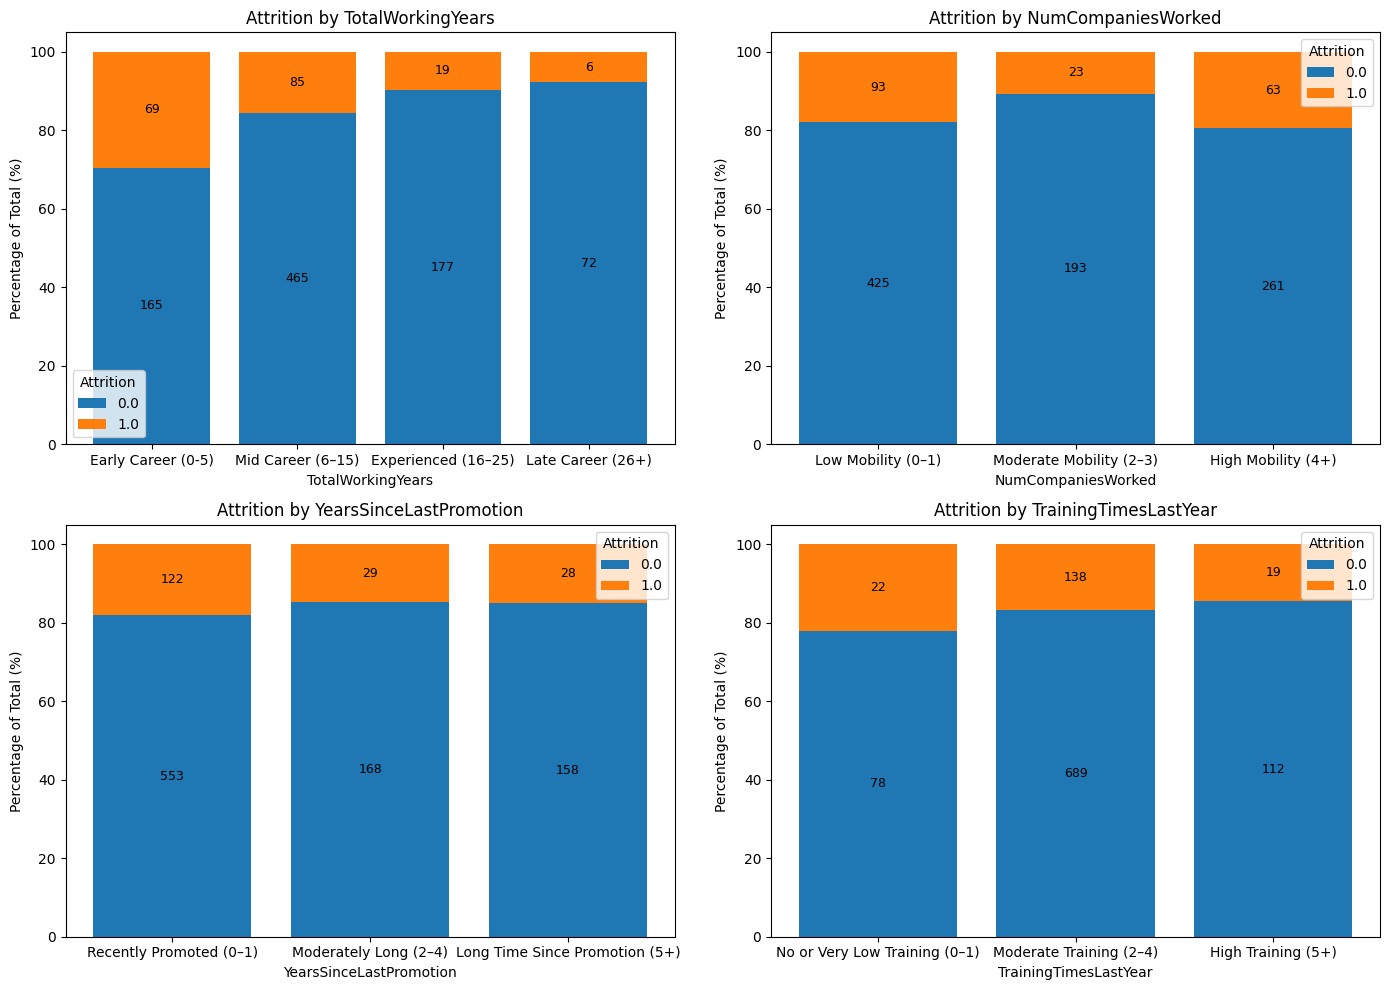

In [35]:
# Define bin edges and labels for each feature
binning_info = {
    'TotalWorkingYears': {
        'bins': [0, 5, 15, 25, np.inf],
        'labels': ['Early Career (0-5)', 'Mid Career (6–15)', 'Experienced (16–25)', 'Late Career (26+)']
    },
    'NumCompaniesWorked': {
        'bins': [-1, 1, 3, np.inf],  # -1 to include 0 in first bin
        'labels': ['Low Mobility (0–1)', 'Moderate Mobility (2–3)', 'High Mobility (4+)']
    },
    'YearsSinceLastPromotion': {
        'bins': [-1, 1, 4, np.inf],
        'labels': ['Recently Promoted (0–1)', 'Moderately Long (2–4)', 'Long Time Since Promotion (5+)']
    },
    'TrainingTimesLastYear': {
        'bins': [-1, 1, 4, np.inf],
        'labels': ['No or Very Low Training (0–1)', 'Moderate Training (2–4)', 'High Training (5+)']
    }
}

df_num_binned = df_numerical.copy()

# Apply binning for each numerical feature
for feature, info in binning_info.items():
    df_num_binned[feature + '_binned'] = pd.cut(
        df_num_binned[feature],
        bins=info['bins'],
        labels=info['labels'],
        include_lowest=True,
        right=True
    )

# Features to plot with their binned column names
features_binned = [f + '_binned' for f in binning_info.keys()]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature_binned in enumerate(features_binned):
    feature = feature_binned.replace('_binned', '')
    ax = axes[i]

    # Group and count data by binned feature and Attrition
    count_data = df_num_binned.groupby([feature_binned, 'Attrition_num'], observed=True).size().unstack(fill_value=0)

    # Calculate percentage for stacking (normalize by total per category)
    percentage_data = count_data.divide(count_data.sum(axis=1), axis=0) * 100

    # Plot stacked bar chart
    bottom = np.zeros(len(count_data))
    for attrition_status in percentage_data.columns:
        bars = ax.bar(count_data.index.astype(str), percentage_data[attrition_status], bottom=bottom, label=attrition_status)
        # Add counts as labels in the middle of each segment
        for rect, count in zip(bars, count_data[attrition_status]):
            height = rect.get_height()
            if height > 0:
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + height / 2,
                    str(count),
                    ha='center', va='center', fontsize=9
                )
        bottom += percentage_data[attrition_status].values

    ax.set_title(f'Attrition by {feature}')
    ax.set_ylabel('Percentage of Total (%)')
    ax.set_xlabel(feature)
    ax.legend(title='Attrition')

plt.tight_layout()
plt.show()

**Insights** from **Career History & Growth**

`Attrition` by `TotalWorkingYears`

**Observation**: The chart shows that the highest proportion of employees leaving comes from the "Early Career (0-5 years)" group. The attrition rate decreases significantly as employees gain more total work experience.

**Key Takeaway**: Employees in the early stages of their careers are the most likely to leave.

`Attrition` by `NumCompaniesWorked`

**Observation**: The chart shows that attrition is highest for employees at the extremes. Those with Low Mobility (worked at 0-1 other companies) and those with High Mobility (worked at 4+ other companies) have a similar, higher chance of leaving. The group with Moderate Mobility (2-3 other companies) is the most stable and least likely to leave.

**Key Takeaway**: Attrition risk isn't a straight line; it's high for both the least experienced and the most frequent job-changers. The "sweet spot" for retention seems to be employees who have some experience but aren't constantly moving between companies.

`Attrition` by `YearsSinceLastPromotion`

**Observation**: This chart presents a surprising insight: the group most recently promoted (0-1 years ago) has the highest rate of attrition. The rate is lower for those who have waited longer for a promotion.

**Key Takeaway**: A recent promotion does not prevent attrition; it may even be a trigger for it.

`Attrition` by `TrainingTimesLastYear`

**Observation**: There is a clear trend showing that employees who receive less training ("No or Very Low Training") have a higher rate of attrition. The more training an employee receives, the less likely they are to leave.

**Key Takeaway**: A lack of investment in employee development is strongly linked to attrition.


#### Financial & External Factors

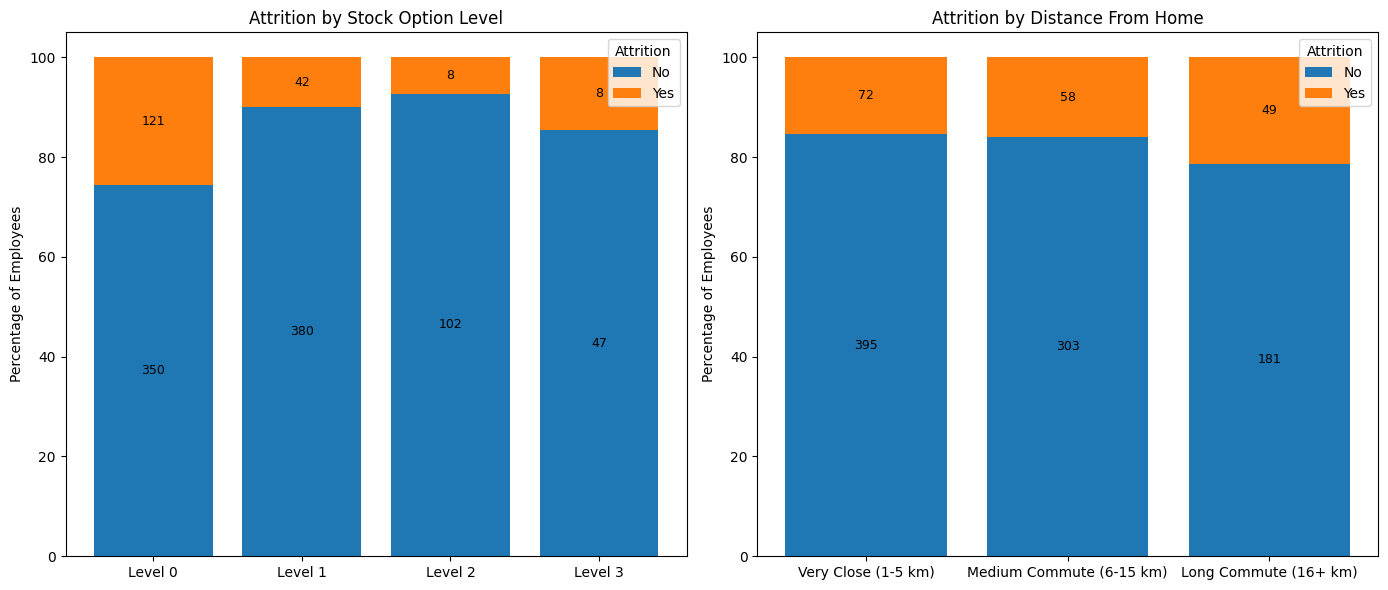

In [36]:
# Binning DistanceFromHome
df_numerical = df_numerical.copy()
df_numerical['Attrition'] = df_cleaned['Attrition'] # Attrition is 0 or 1 here
bins = [0, 5, 15, df_numerical['DistanceFromHome'].max()]
labels = ['Very Close (1-5 km)', 'Medium Commute (6-15 km)', 'Long Commute (16+ km)']
df_numerical['DistanceFromHome_binned'] = pd.cut(df_numerical['DistanceFromHome'], bins=bins, labels=labels, include_lowest=True)

# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for StockOptionLevel
feature = 'StockOptionLevel'
# This uses df_categorical where Attrition is 'No'/'Yes'
count_data = df_categorical.groupby([feature, 'Attrition']).size().unstack(fill_value=0)
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
bottom = None
# Iterate using 'No' and 'Yes' which are column names in percent_data
for attrition_status in ['No', 'Yes']:
    bar = axes[0].bar(count_data.index.astype(str), percent_data[attrition_status], label=attrition_status, bottom=bottom)
    for rect, count in zip(bar, count_data[attrition_status]):
        height = rect.get_height()
        y_pos = rect.get_y() + height / 2 if bottom is None else rect.get_y() + height / 2
        axes[0].text(rect.get_x() + rect.get_width() / 2, y_pos, str(count), ha='center', va='center', fontsize=9)
    # Update bottom for stacking
    bottom = percent_data[attrition_status] if bottom is None else bottom + percent_data[attrition_status]
axes[0].set_title('Attrition by Stock Option Level')
axes[0].set_ylabel('Percentage of Employees')
axes[0].legend(title='Attrition')


# Plot for DistanceFromHome (Binned)
feature_binned = 'DistanceFromHome_binned'
# This uses df_numerical where Attrition is 0 or 1
count_data = df_numerical.groupby([feature_binned, 'Attrition'], observed=False).size().unstack(fill_value=0)
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
bottom = None
# Iterate using 0 and 1 which are column names in percent_data for this plot
for attrition_status in [0, 1]:
    bar = axes[1].bar(count_data.index.astype(str), percent_data[attrition_status], label=attrition_status, bottom=bottom)
    for rect, count in zip(bar, count_data[attrition_status]):
        height = rect.get_height()
        y_pos = rect.get_y() + height / 2 if bottom is None else rect.get_y() + height / 2
        axes[1].text(rect.get_x() + rect.get_width() / 2, y_pos, str(count), ha='center', va='center', fontsize=9)
    # Update bottom for stacking
    bottom = percent_data[attrition_status] if bottom is None else bottom + percent_data[attrition_status]

# Update legend labels for the second plot to show 'No' and 'Yes'
axes[1].set_title('Attrition by Distance From Home')
axes[1].set_ylabel('Percentage of Employees')
# Map the legend labels from 0/1 to 'No'/'Yes' for clarity
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['No', 'Yes'], title='Attrition')


# Final Layout
plt.tight_layout()
plt.show()

**Insights** from **Financial & External Factors**

`Attrition` by `StockOptionLevel`

**Observation**: The chart clearly shows that employees with the lowest stock option level (Level 0) have the highest rate of attrition. As the stock option level increases, the percentage of employees leaving the company decreases significantly.

**Key Takeaway**: Stock options act as a strong incentive for employees to stay with the company.

`Attrition` by `DistanceFromHome`

**Observation**: There is a clear and direct relationship between commute distance and attrition. Employees with a "Long Commute" (16+ km) have the highest rate of leaving, while those who live "Very Close" (1-5 km) are the most likely to stay.

**Key Takeaway**: A long daily commute increases the likelihood of an employee leaving.

## Analysis of Business Problem 2

### Gather Insights based on Variable Relationship

Here are summary insights based on four clusters of features

1. **Job Demands & Role**

    The analysis shows that specific job conditions are major drivers of attrition. Employees who work overtime, travel frequently, or are in certain high-pressure roles like Sales Representative have a significantly higher probability of leaving. Attrition is not a general problem; it is concentrated in these "hotspots."

2. **Employee Satisfaction & Engagement**

    This is the most direct indicator of attrition risk. Low satisfaction with the job, the work environment, and work-life balance are all strongly linked to employees leaving. Furthermore, employees who are not actively involved or engaged in their work are a major flight risk.

3. **Career History & Growth**

    An employee's career stage and development opportunities are critical. Attrition is highest among early-career employees, those who receive little training, and surprisingly, those who were just recently promoted. The risk is also elevated for employees who are either new to the workforce or who change jobs very frequently.

4. **Financial & External Factors**

    Tangible financial incentives and external life factors play a key role in retention. Employees with low or no stock options are more likely to leave, and a long daily commute significantly increases attrition risk.

### Ideate Recommendation Actions

1. **Implement Flexible Work & Remote Options**

* **Problem:** `[Financial & External Factors]` `[Employee Satisfaction & Engagement]` High attrition is strongly linked to the daily friction of a long commute and a poor work-life balance, which contributes to employee burnout.
* **Target Employee Groups:**
    * Employees with a **Long Commute** (16+ km)
    * Employees with **Low Work-Life Balance**
    * Employees working **OverTime**
    * Employees who **Travel Frequently**
* **Strategy Description:** Develop and launch a clear company policy on flexible work. This could include a hybrid model (e.g., 2-3 days in the office), fully remote options for eligible roles, or flexible start/end times to avoid peak traffic. The policy should define eligibility criteria, expectations for communication and availability, and the technology provided to support remote work effectively.
* **Success Metrics:**
    * Reduction in the attrition rate for employees in the `Long Commute` group.
    * Improvement in survey scores for the `WorkLifeBalance` category.
    * A decrease in voluntary `OverTime` hours logged.

2. **Strengthen Career Pathing & Development Programs**

* **Problem:** `[Career History & Growth]` Employees, particularly those early in their careers or in roles with high turnover, are leaving due to a perceived lack of growth opportunities and investment in their skills.
* **Target Employee Groups:**
    * **Early-Career** employees (0-5 years experience)
    * Employees who received **No or Very Low Training**
    * **Recently Promoted** staff (to show them the next step)
    * Employees in high-turnover **Job Roles**
* **Strategy Description:** Create and publicize transparent "career ladders" for key roles, showing clear steps and skill requirements for advancement. Implement a formal mentorship program pairing junior staff with senior leaders. Increase the training budget and offer a mix of internal workshops and external courses that are directly linked to the skills needed for promotion.
* **Success Metrics:**
    * A lower attrition rate for the `Early-Career` employee segment.
    * An increased rate of internal promotions versus external hires for senior roles.
    * Higher `JobSatisfaction` and `JobInvolvement` scores in employee surveys.
    * An increase in the average number of `TrainingTimesLastYear` per employee.

3. **Conduct "Deep Dive" Reviews into High-Stress Roles**

* **Problem:** `[Job Demands & Role]` Attrition is not evenly distributed across the company; specific job roles act as "hotspots" with extremely high turnover, indicating unique, unaddressed challenges.
* **Target Employee Groups:**
    * Employees in specific **Job Roles** (e.g., Sales Representatives, Laboratory Technicians)
    * This investigation will naturally include employees with high **OverTime** and **Low Job Satisfaction** within these roles.
* **Strategy Description:** Form a task force (including HR, department leadership, and employees from the role) to diagnose the root causes of stress. Use anonymous surveys, confidential focus groups, and one-on-one "stay interviews" to understand the issues—whether it's workload, compensation structure, management, or lack of tools. Develop a tailored action plan for each role based on these specific findings.
* **Success Metrics:**
    * A significant reduction in the attrition rate for the targeted `Job Roles`.
    * An improvement in `JobSatisfaction` and `WorkLifeBalance` scores for employees in these roles.
    * A measurable decrease in `OverTime` hours logged for these specific jobs.

4. **Enhance Support for Newly Promoted Employees**

* **Problem:** `[Career History & Growth]` `[Employee Satisfaction & Engagement]` Data reveals a surprising spike in attrition shortly after a promotion. This suggests a "promote-and-leave" phenomenon where the new role may not meet expectations or is used as leverage for external job offers.
* **Target Employee Groups:**
    * **Recently Promoted** employees (within the last year).
* **Strategy Description:** Implement a structured "Post-Promotion Support Plan." This should include a 90-day onboarding for the new role, clear goal-setting with their manager, and a confidential check-in with HR after 2-3 months. The goal is to ensure the transition is smooth, expectations are aligned, and the employee feels supported beyond just receiving a new title.
* **Success Metrics:**
    * A decrease in the attrition rate among employees within their first year after a promotion.
    * Higher `JobSatisfaction` scores from recently promoted employees.
    * Positive qualitative feedback from employees who participated in the support plan.

5. **Expand and Communicate Financial Incentives**

* **Problem:** `[Financial & External Factors]` Employees with little to no long-term financial stake in the company (i.e., no stock options) are more likely to seek opportunities elsewhere.
* **Target Employee Groups:**
    * Employees with **Stock Option Level 0**
    * High-potential employees in high-turnover roles.
    * Employees with **High Mobility** (frequent job-changers).
* **Strategy Description:** Review the current stock option plan to identify opportunities for expansion to lower job levels or critical roles. Create and distribute clear, engaging communication materials (e.g., simple videos, infographics) that explain the value of the stock plan and its potential growth over time, ensuring employees see it as a key part of their total compensation.
* **Success Metrics:**
    * A lower attrition rate for employees in the `Stock Option Level 0` and `Level 1` groups.
    * Increased participation in optional financial wellness or stock plan information sessions.
    * Positive feedback regarding total compensation packages in employee surveys.

## Analysis of Business Problem 3
> 🔮 Business Problem 3: **How to predict the risk of employee attrition before employees actually leave the company?**

### Ideate and Prioritize Approach

Phase 1: **Build a Foundational Predictive Model (High Priority)**

The first priority is to build and validate a working model to prove that attrition can be predicted from the data.

1.  **Prepare the Data:** This is the most critical first step.
    * **Action:** Select the most relevant numerical and categorical features identified earlier. Convert categorical data (like `JobRole`, `OverTime`) into a format that a model can understand (e.g., one-hot encoding).
    * **Why:** A model cannot work without clean, properly formatted data.

2.  **Train Predictive Models:**
    * **Action:** Start by training two types of models:
        * A simple model like **Logistic Regression** to serve as a baseline.
        * A more powerful model like **Random Forest** or **XGBoost**, which are excellent at finding complex patterns in this type of data.
    * **Why:** This makes it possible to see if a more complex model provides a significant improvement over a simple one.

3.  **Evaluate Model Performance:**
    * **Action:** Test the models on a set of data they haven't seen before. Focus on the metric of **Recall**—how well the model catches employees who are *actually* likely to leave. Use an **AUC-ROC curve** to measure overall performance.
    * **Why:** It is necessary to be sure the model is genuinely effective and not just guessing. For HR, it's better to have a few false alarms than to miss someone who is about to resign.

Phase 2: **Interpret and Visualize the Results (Medium Priority)**

Once a working model is available, the next step is to make its predictions understandable and useful for HR.

1.  **Explain the "Why":**
    * **Action:** Use **Feature Importance** plots from the model. These charts show which factors (e.g., `OverTime`, `TotalWorkingYears`) have the biggest impact on the model's predictions.
    * **Why:** HR needs to trust the model. Explaining *why* an employee is flagged as high-risk makes the prediction actionable and connects back to the insights from the earlier analysis.

2.  **Create a Prototype Dashboard:**
    * **Action:** Build a simple, interactive dashboard (for example, using Streamlit or Looker Studio). This dashboard should display a list of current employees, sorted by their predicted attrition risk score (e.g., 0% to 100%).
    * **Why:** This turns the model's output from a list of numbers into an easy-to-use tool that HR can use to prioritize retention efforts.

Phase 3: **Automate and Refine (Lower Priority)**

This final phase is about making the prediction system a regular part of HR operations.

1.  **Automate the Process:**
    * **Action:** Create a script that can automatically pull the latest employee data, run the model to score each employee, and update the dashboard or a connected Google Sheet/database. This process could be scheduled to run monthly or quarterly.
    * **Why:** Automation ensures the risk assessment is always up-to-date without requiring manual effort each time.

2.  **Monitor and Retrain:**
    * **Action:** Plan to retrain the model with new data (e.g., every 6-12 months). As employees join and leave, and as company policies change, the factors driving attrition may evolve.
    * **Why:** This keeps the model accurate and relevant over the long term.

For next steps, this project will do Phase 1 to develop prediction model for Employee Attrition

### Data Preparation / Preprocessing

#### Compile Dataset

In [37]:
# Copy relevant features from df_numerical to df_model
df_model = df_numerical[['TotalWorkingYears', 'DistanceFromHome', 'TrainingTimesLastYear', 'NumCompaniesWorked', 'YearsSinceLastPromotion', 'Attrition_num']].copy()

# Copy relevant categorical features from df_categorical to df_model
categorical_features = ['OverTime', 'JobRole', 'StockOptionLevel', 'JobInvolvement', 'EnvironmentSatisfaction', 'BusinessTravel', 'JobSatisfaction', 'WorkLifeBalance']
for feature in categorical_features:
    df_model[feature] = df_categorical[feature]

# Change dtype of Attrition_num to int
df_model['Attrition_num'] = df_model['Attrition_num'].astype(int)

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   TotalWorkingYears        1058 non-null   int64   
 1   DistanceFromHome         1058 non-null   int64   
 2   TrainingTimesLastYear    1058 non-null   int64   
 3   NumCompaniesWorked       1058 non-null   int64   
 4   YearsSinceLastPromotion  1058 non-null   int64   
 5   Attrition_num            1058 non-null   int64   
 6   OverTime                 1058 non-null   object  
 7   JobRole                  1058 non-null   object  
 8   StockOptionLevel         1058 non-null   object  
 9   JobInvolvement           1058 non-null   category
 10  EnvironmentSatisfaction  1058 non-null   category
 11  BusinessTravel           1058 non-null   object  
 12  JobSatisfaction          1058 non-null   category
 13  WorkLifeBalance          1058 non-null   category
dtypes: category(4

#### Scaling

In [39]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform
df_model['TotalWorkingYears_norm'] = scaler.fit_transform(df_model[['TotalWorkingYears']])
df_model['DistanceFromHome_norm'] = scaler.fit_transform(df_model[['DistanceFromHome']])
df_model['TrainingTimesLastYear_norm'] = scaler.fit_transform(df_model[['TrainingTimesLastYear']])
df_model['NumCompaniesWorked_norm'] = scaler.fit_transform(df_model[['NumCompaniesWorked']])
df_model['YearsSinceLastPromotion_norm'] = scaler.fit_transform(df_model[['YearsSinceLastPromotion']])

# Drop original columns
df_model = df_model.drop(columns=['TotalWorkingYears', 'DistanceFromHome', 'TrainingTimesLastYear', 'NumCompaniesWorked', 'YearsSinceLastPromotion'])

#### Encoding

In [40]:
# Loop One-Hot Encoding for categorical features
for feature in categorical_features:
    dummies = pd.get_dummies(df_model[feature], prefix=feature)
    dummies = dummies.astype(int)  # convert all dummy columns to int
    df_model = pd.concat([df_model, dummies], axis=1)

# Drop original categorical feature columns
df_model = df_model.drop(columns=categorical_features)

In [41]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition_num                      1058 non-null   int64  
 1   TotalWorkingYears_norm             1058 non-null   float64
 2   DistanceFromHome_norm              1058 non-null   float64
 3   TrainingTimesLastYear_norm         1058 non-null   float64
 4   NumCompaniesWorked_norm            1058 non-null   float64
 5   YearsSinceLastPromotion_norm       1058 non-null   float64
 6   OverTime_No                        1058 non-null   int64  
 7   OverTime_Yes                       1058 non-null   int64  
 8   JobRole_Healthcare Representative  1058 non-null   int64  
 9   JobRole_Human Resources            1058 non-null   int64  
 10  JobRole_Laboratory Technician      1058 non-null   int64  
 11  JobRole_Manager                    1058 non-null   int64  
 1

In [42]:
# Show percentage of Attrition
attrition_percentage = df_model['Attrition_num'].value_counts(normalize=True) * 100
print(attrition_percentage)

Attrition_num
0    83.081285
1    16.918715
Name: proportion, dtype: float64


#### Split Data

Orginal Data

In [43]:
# Import necessary libraries for data splitting and resampling
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
features = df_model.drop('Attrition_num', axis=1)
target = df_model['Attrition_num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

SMOTE

In [44]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

SMOTEENN

In [45]:
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

### Modeling

#### Original Data

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.872642   0.833333  0.384615  0.526316
1         Decision Tree (dt)  0.806604   0.472222  0.435897  0.453333
2         Random Forest (rf)  0.844340   0.750000  0.230769  0.352941
3  K-Nearest Neighbors (knn)  0.816038   0.500000  0.179487  0.264151
4           Naive Bayes (nb)  0.735849   0.369231  0.615385  0.461538
Plotting ROC curve for Logistic Regression (lr)...


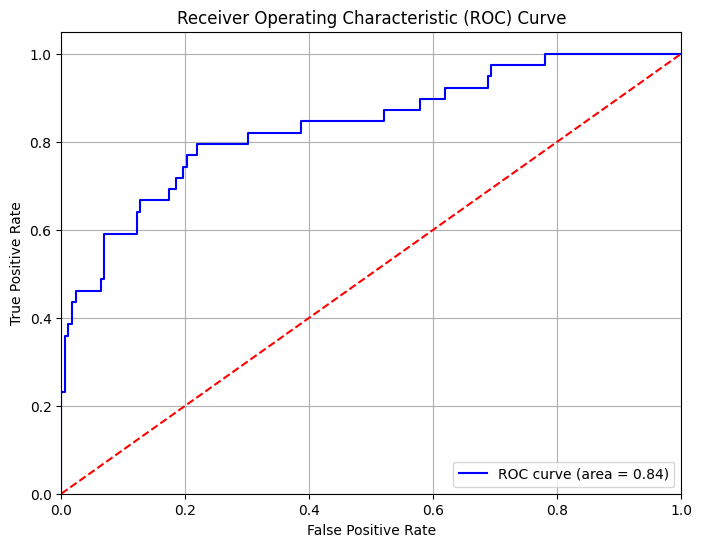

Plotting ROC curve for Decision Tree (dt)...


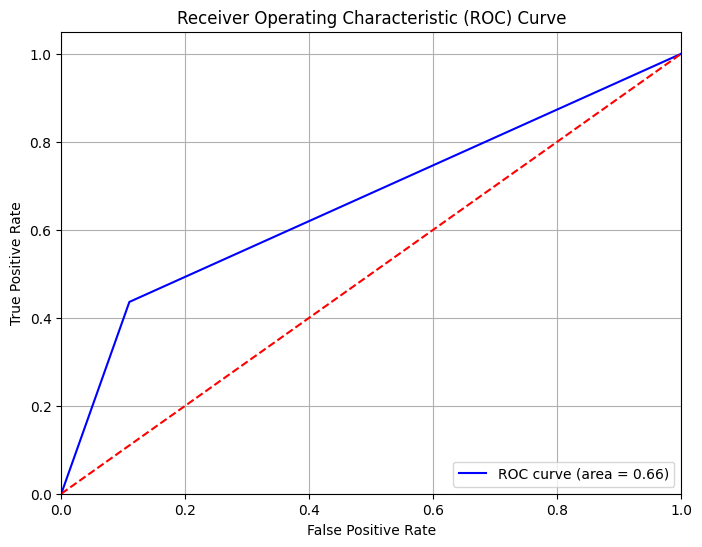

Plotting ROC curve for Random Forest (rf)...


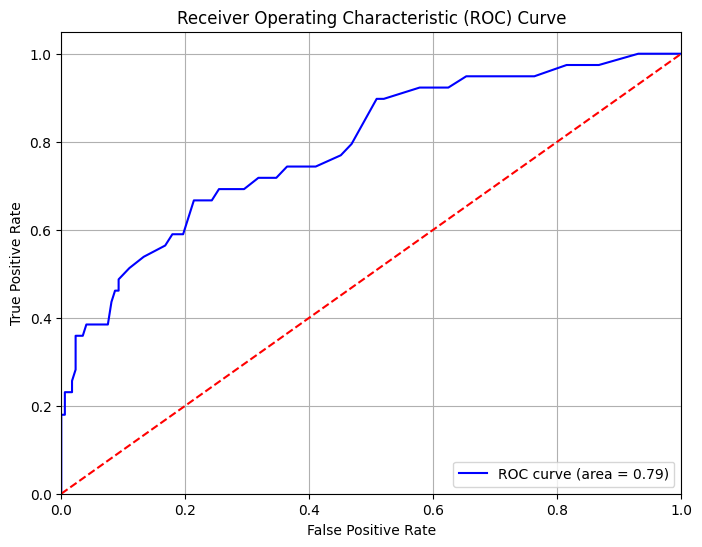

Plotting ROC curve for K-Nearest Neighbors (knn)...


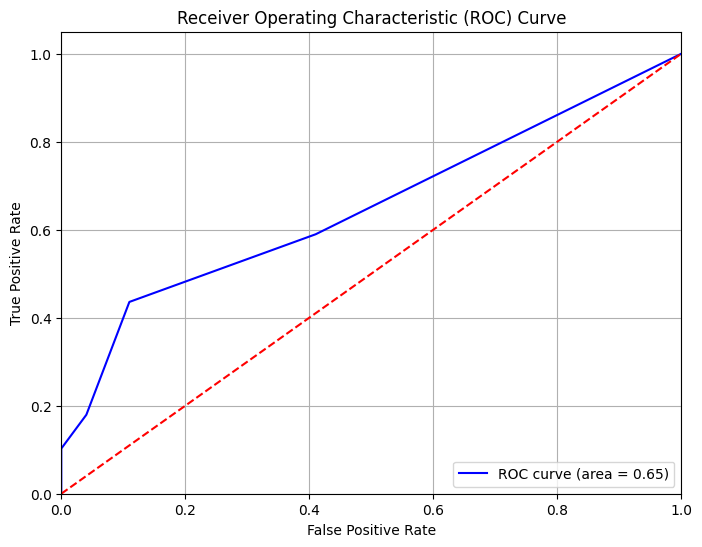

Plotting ROC curve for Naive Bayes (nb)...


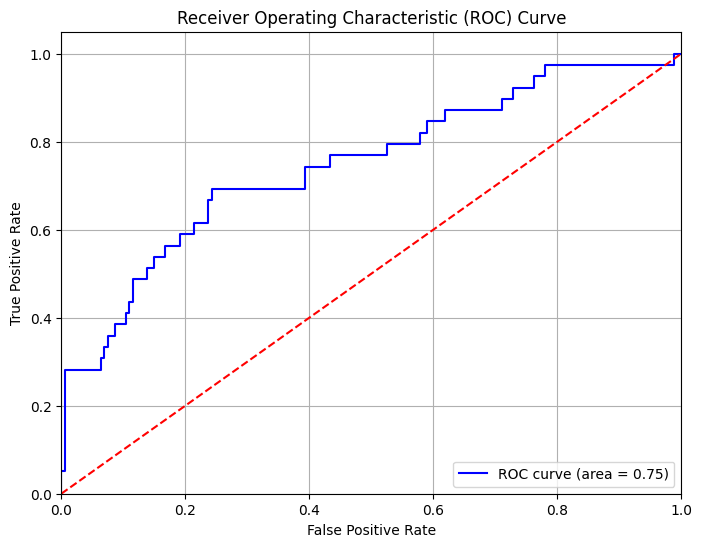

In [46]:
# Model training
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

summary_original = summary_df.copy()

# AUC-ROC curve
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot ROC curve for each model
for model_name, model in zip(evaluasi_model.keys(), [lr, dt, rf, knn, nb]):
    print(f"Plotting ROC curve for {model_name}...")
    plot_roc_curve(model, X_test, y_test)

In [47]:
# Save models
with open('lr_original.pkl', 'wb') as file:
  pickle.dump(lr, file)

with open('dt_original.pkl', 'wb') as file:
  pickle.dump(dt, file)

with open('rf_original.pkl', 'wb') as file:
  pickle.dump(rf, file)

with open('knn_original.pkl', 'wb') as file:
  pickle.dump(knn, file)

with open('nb_original.pkl', 'wb') as file:
  pickle.dump(nb, file)

#### SMOTE

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.858491   0.655172  0.487179  0.558824
1         Decision Tree (dt)  0.768868   0.352941  0.307692  0.328767
2         Random Forest (rf)  0.839623   0.619048  0.333333  0.433333
3  K-Nearest Neighbors (knn)  0.679245   0.301370  0.564103  0.392857
4           Naive Bayes (nb)  0.636792   0.302083  0.743590  0.429630
Plotting ROC curve for Logistic Regression (lr)...


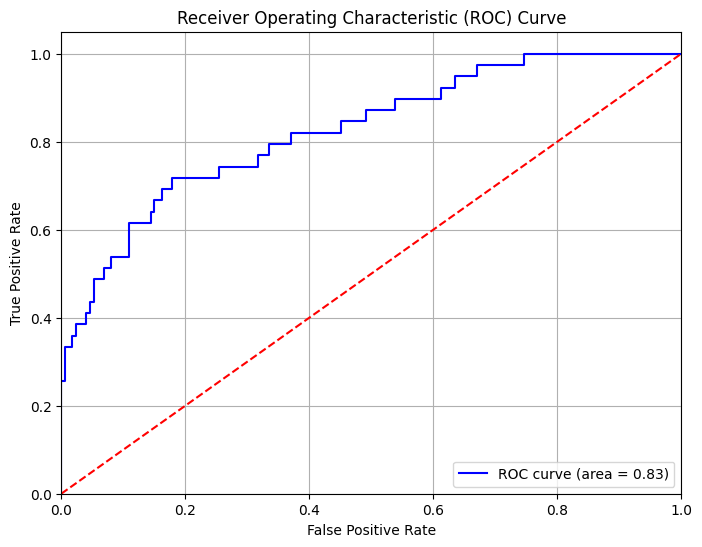

Plotting ROC curve for Decision Tree (dt)...


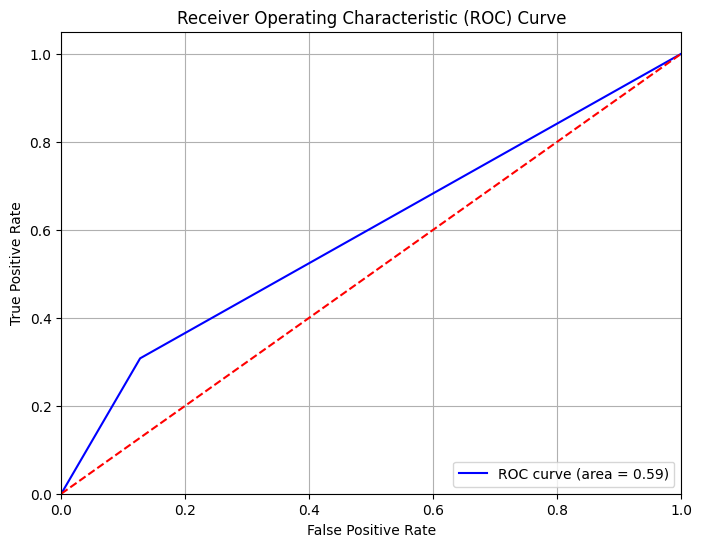

Plotting ROC curve for Random Forest (rf)...


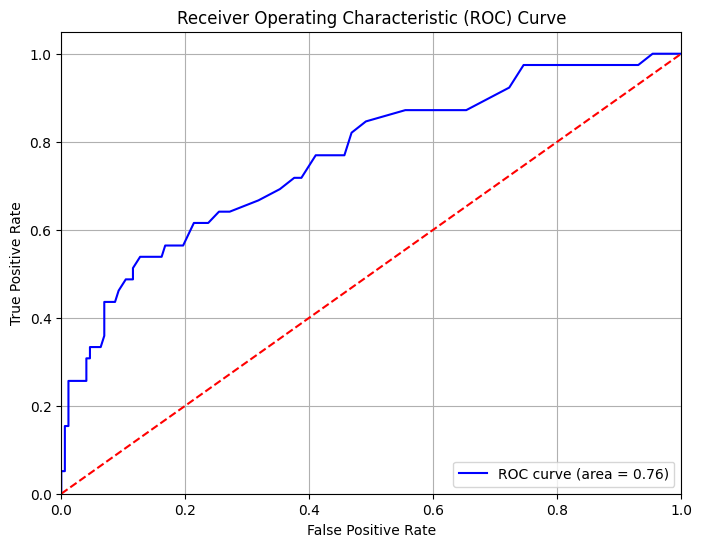

Plotting ROC curve for K-Nearest Neighbors (knn)...


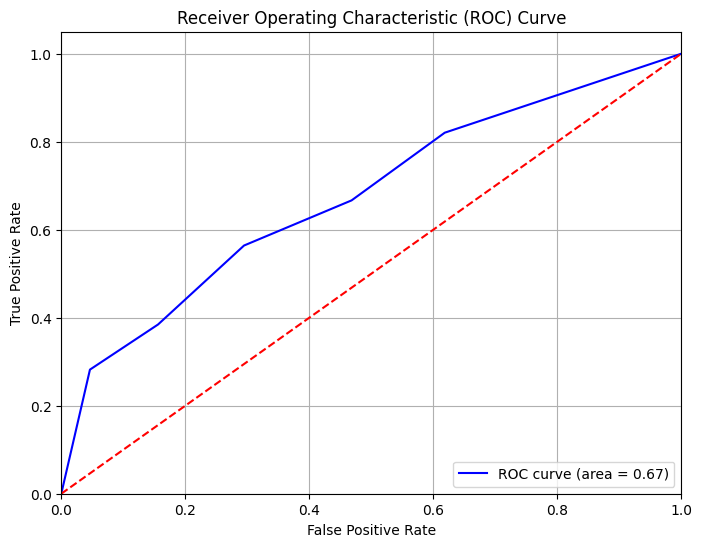

Plotting ROC curve for Naive Bayes (nb)...


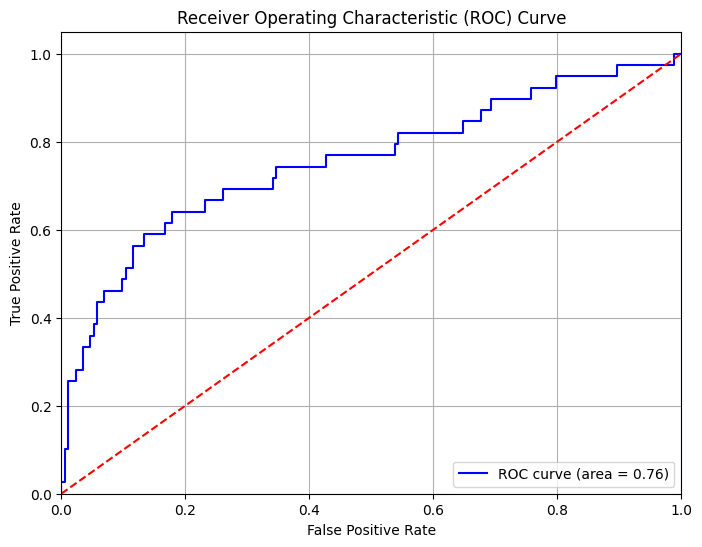

In [48]:
X_train, y_train = X_train_smote, y_train_smote

# Model training
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

summary_smote = summary_df.copy()

# AUC-ROC curve
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot ROC curve for each model
for model_name, model in zip(evaluasi_model.keys(), [lr, dt, rf, knn, nb]):
    print(f"Plotting ROC curve for {model_name}...")
    plot_roc_curve(model, X_test, y_test)

In [49]:
# Save models
with open('lr_smote.pkl', 'wb') as file:
  pickle.dump(lr, file)

with open('dt_smote.pkl', 'wb') as file:
  pickle.dump(dt, file)

with open('rf_smote.pkl', 'wb') as file:
  pickle.dump(rf, file)

with open('knn_smote.pkl', 'wb') as file:
  pickle.dump(knn, file)

with open('nb_smote.pkl', 'wb') as file:
  pickle.dump(nb, file)

#### SMOTEEN

Model selesai dilatih.
Evaluasi model klasifikasi:

                       Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression (lr)  0.731132   0.363636  0.615385  0.457143
1         Decision Tree (dt)  0.740566   0.370968  0.589744  0.455446
2         Random Forest (rf)  0.764151   0.400000  0.564103  0.468085
3  K-Nearest Neighbors (knn)  0.537736   0.238938  0.692308  0.355263
4           Naive Bayes (nb)  0.646226   0.308511  0.743590  0.436090
Plotting ROC curve for Logistic Regression (lr)...


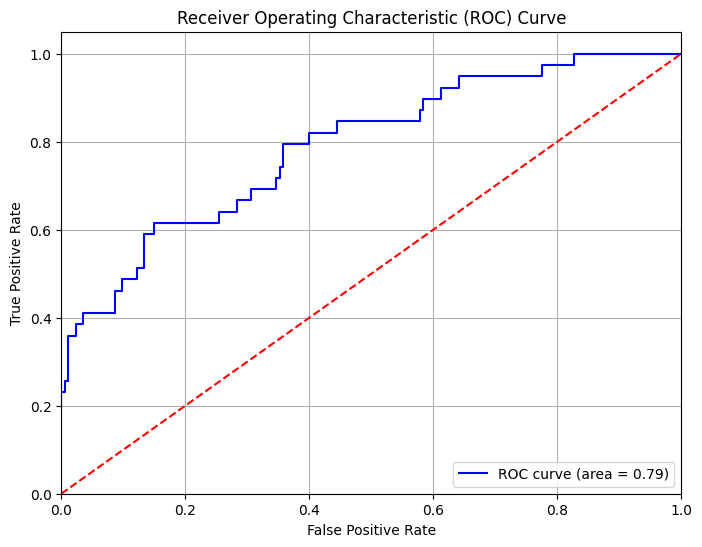

Plotting ROC curve for Decision Tree (dt)...


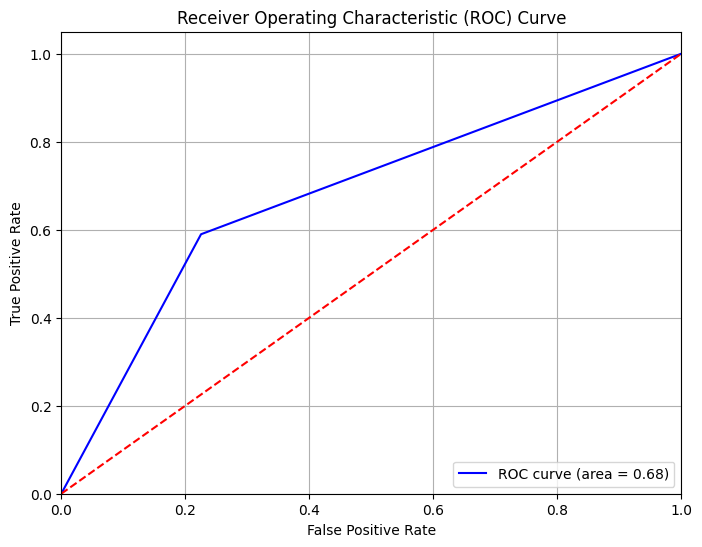

Plotting ROC curve for Random Forest (rf)...


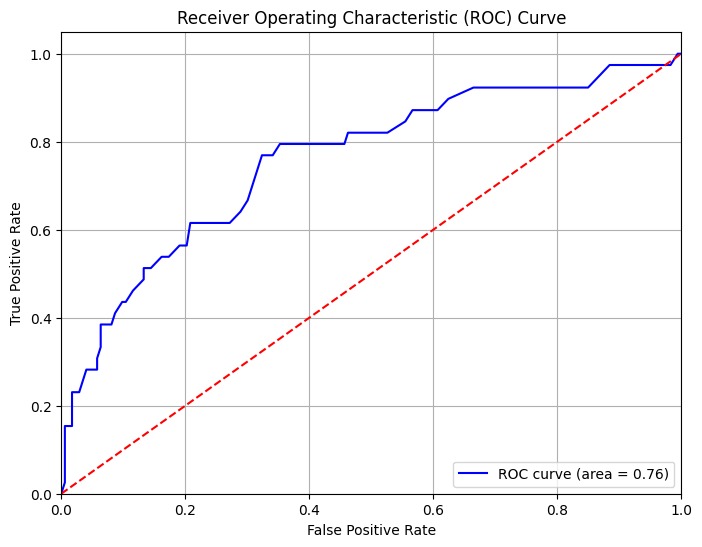

Plotting ROC curve for K-Nearest Neighbors (knn)...


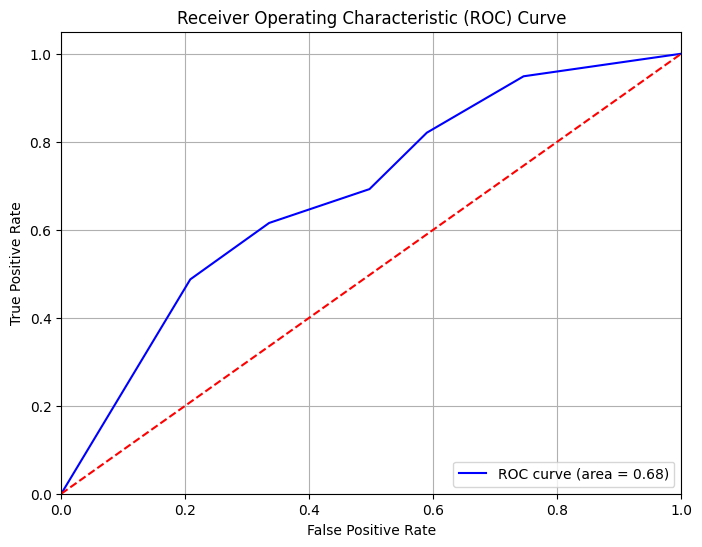

Plotting ROC curve for Naive Bayes (nb)...


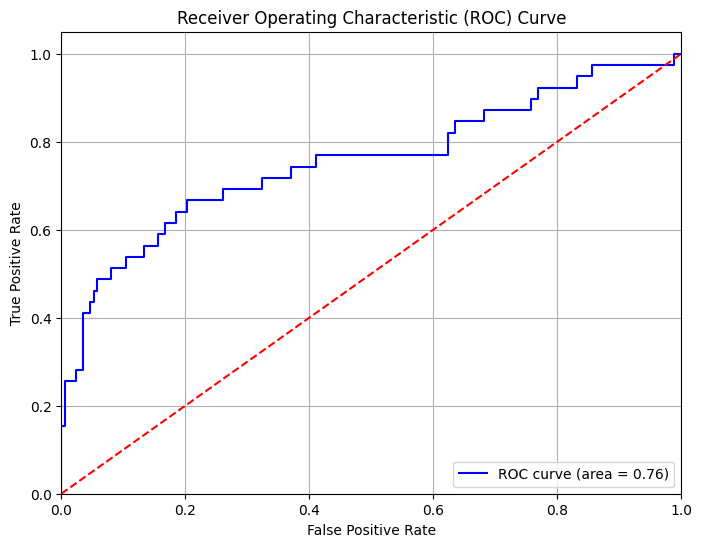

In [50]:
X_train, y_train = X_train_smoteenn, y_train_smoteenn

# Model training
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model selesai dilatih.")

# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test, y_test),
  # 'Support Vector Machine (svm)': evaluate_model(svm, X_test, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

summary_smoteenn = summary_df.copy()

# AUC-ROC curve
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot ROC curve for each model
for model_name, model in zip(evaluasi_model.keys(), [lr, dt, rf, knn, nb]):
    print(f"Plotting ROC curve for {model_name}...")
    plot_roc_curve(model, X_test, y_test)

In [51]:
# Save models
with open('lr_smoteenn.pkl', 'wb') as file:
  pickle.dump(lr, file)

with open('dt_smoteenn.pkl', 'wb') as file:
  pickle.dump(dt, file)

with open('rf_smoteenn.pkl', 'wb') as file:
  pickle.dump(rf, file)

with open('knn_smoteenn.pkl', 'wb') as file:
  pickle.dump(knn, file)

with open('nb_smoteenn.pkl', 'wb') as file:
  pickle.dump(nb, file)

### Evaluation

In [52]:
# Show summary of all evaluations
summary_all = pd.concat([summary_original, summary_smote, summary_smoteenn], keys=['Original', 'SMOTE', 'SMOTE-ENN'])
print("Summary of all evaluations:\n")
summary_all

Summary of all evaluations:



Model  Accuracy  Precision    Recall  \
Original  0   Logistic Regression (lr)  0.872642   0.833333  0.384615   
          1         Decision Tree (dt)  0.806604   0.472222  0.435897   
          2         Random Forest (rf)  0.844340   0.750000  0.230769   
          3  K-Nearest Neighbors (knn)  0.816038   0.500000  0.179487   
          4           Naive Bayes (nb)  0.735849   0.369231  0.615385   
SMOTE     0   Logistic Regression (lr)  0.858491   0.655172  0.487179   
          1         Decision Tree (dt)  0.768868   0.352941  0.307692   
          2         Random Forest (rf)  0.839623   0.619048  0.333333   
          3  K-Nearest Neighbors (knn)  0.679245   0.301370  0.564103   
          4           Naive Bayes (nb)  0.636792   0.302083  0.743590   
SMOTE-ENN 0   Logistic Regression (lr)  0.731132   0.363636  0.615385   
          1         Decision Tree (dt)  0.740566   0.370968  0.589744   
          2         Random Forest (rf)  0.764151   0.400000  0.564103   
          3  K-Nearest Neighbors (knn)  0.537736   0.238938  0.692308   
          4           Naive Bayes (nb)  0.646226   0.308511  0.743590   

             F1-Score  
Original  0  0.526316  
          1  0.453333  
          2  0.352941  
          3  0.264151  
          4  0.461538  
SMOTE     0  0.558824  
          1  0.328767  
          2  0.433333  
          3  0.392857  
          4  0.429630  
SMOTE-ENN 0  0.457143  
          1  0.455446  
          2  0.468085  
          3  0.355263  
          4  0.436090

✅ **Best Model Recommendation for Employee Attrition Prediction**

---

📊 **Evaluation Metrics Focus**

In employee attrition prediction, **recall** is the most critical metric, as missing employees who are likely to leave (false negatives) can lead to significant operational and financial consequences. The **F1-score** is also crucial, as it balances recall and precision, particularly important in imbalanced datasets.

**Top-performing models by Recall and F1-Score:**

| Model Setting | Model                | Accuracy | Precision | Recall  | F1-Score |
|---------------|----------------------|----------|-----------|---------|----------|
| SMOTE         | Logistic Regression  | 0.858    | 0.655     | 0.487   | **0.559** |
| SMOTE         | Naive Bayes          | 0.637    | 0.302     | **0.744** | 0.430    |
| SMOTE-ENN     | Logistic Regression  | 0.731    | 0.364     | 0.615   | 0.457    |
| SMOTE-ENN     | KNN                  | 0.538    | 0.239     | 0.692   | 0.355    |

Among these, **SMOTE + Logistic Regression** achieves the best **F1-score (0.559)**, while maintaining a solid recall (0.487) and accuracy (0.858). This makes it the best overall performer.

---

🔍 **Why SMOTE + Logistic Regression is the Best Choice**

✅ **Balanced Performance**
- Achieves the **highest F1-score**, balancing the model’s ability to correctly identify true leavers while minimizing false positives.
- Maintains competitive recall, ensuring effective identification of at-risk employees.

✅ **Model Interpretability**
- Logistic Regression provides **high transparency**, making it easy to explain feature impacts to HR stakeholders.
- Feature coefficients directly support **data-driven HR policies**, enabling confident decisions on workload, compensation, or engagement strategies.

✅ **Effective Class Imbalance Handling**
- SMOTE enhances model fairness by **synthesizing underrepresented attrition samples**.
- This prevents the model from ignoring the minority class, leading to better detection of potential leavers.

---

💼 **Business Context: Strategic Implications**

🧠 **Understanding the Problem**
Employee attrition impacts key business areas:
- Higher **recruitment, training, and onboarding costs**
- Loss of **critical talent and institutional knowledge**
- Disruptions in **team dynamics and productivity**

A predictive model must enable **early intervention**, not just post-attrition analysis.

📌 **Business-Fit Characteristics**

- **Proactive Strategy**: Decent recall ensures a larger portion of actual leavers can be flagged ahead of time.
- **Ease of Implementation**: Logistic Regression is straightforward to deploy, monitor, and retrain.
- **Stakeholder Trust**: The model’s logic and output can be clearly communicated to non-technical HR personnel and management.
- **Actionable Insights**: Interpretability allows HR to connect predictions with root causes and develop retention plans accordingly.

---

🏁 **Conclusion**

**SMOTE + Logistic Regression** stands out as the optimal model due to:
- Best F1-score performance
- Clear interpretability aligned with HR decision processes
- Robustness in handling imbalanced attrition data
- Strategic alignment with business needs

This model is not only technically sound but also practical for real-world HR use, enabling smarter retention decisions and improving workforce stability.


## Conclusion

### 📊 Business Problem 1: **How is the relationship between the variables or factors from the available data and employee attrition?**

The analysis reveals that **employee attrition is driven by a combination of job conditions, personal satisfaction, career progression, and external factors**. These factors can be grouped into four major themes, each contributing uniquely to an employee’s decision to stay or leave.

---

1. 🧱 **Job Demands & Role**
**Key Variables**: `OverTime`, `JobRole`, `BusinessTravel`

- Employees working **overtime** or in roles requiring **frequent travel** face higher stress and burnout, leading to increased attrition.
- Specific roles like **Sales Representative** show disproportionately high turnover, indicating that **attrition is concentrated in certain positions**, not evenly spread across the company.

✅ **Takeaway**: High job demands and stressful roles are strong predictors of employee turnover.

---

2. 😊 **Employee Satisfaction & Engagement**
**Key Variables**: `JobSatisfaction`, `EnvironmentSatisfaction`, `JobInvolvement`, `WorkLifeBalance`

- **Low satisfaction** with the job or work environment is strongly associated with leaving.
- Employees who feel **disconnected or disengaged** in their roles are much more likely to quit.
- A **poor work-life balance** is a particularly strong indicator of potential attrition.

✅ **Takeaway**: Emotional and psychological connection to work is one of the most critical factors influencing attrition.

---

3. 📈 **Career History & Growth**
**Key Variables**: `TotalWorkingYears`, `NumCompaniesWorked`, `YearsSinceLastPromotion`, `TrainingTimesLastYear`

- **Early-career employees** (0–5 years of experience) are most likely to leave, often seeking growth.
- Both **low and high job mobility** are linked to higher attrition—moderate mobility suggests stability.
- Lack of **training opportunities** or career development support increases attrition.
- Interestingly, employees **recently promoted** also show high turnover, possibly due to shifting expectations or unmet promises.

✅ **Takeaway**: Employees leave when they feel stuck—or when they don’t see a clear, fulfilling path forward.

---

4. 💰 **Financial & External Factors**
**Key Variables**: `StockOptionLevel`, `DistanceFromHome`

- Employees without stock options feel **less financially invested** in staying.
- A **long commute** makes leaving more likely, likely due to lifestyle fatigue or lower quality of life.

✅ **Takeaway**: Incentives and daily life logistics significantly affect whether employees remain with a company.

---

📊 Overall Insight

There is **no single factor** that causes employee attrition. Instead, it results from **multiple interrelated elements** across work conditions, emotional satisfaction, personal development, and external life. Recognizing and addressing **key pain points**—like stressful roles, disengagement, lack of growth, and long commutes—can greatly reduce attrition and improve retention.

### 🛠️ Business Problem 2: **What are the recommended actions that companies can take to prevent employee attrition?**

Based on the analysis of employee data and attrition patterns, here are five actionable strategies companies can implement to reduce attrition, along with the key variables involved. These strategies are designed to be practical and easily understood:

---

1. **Implement Flexible Work & Remote Options**  
📌 **Key Variables:** `DistanceFromHome`, `WorkLifeBalance`, `OverTime`, `BusinessTravel`  
- **Why it matters:** Long commutes and poor work-life balance are common triggers of burnout, especially among those who travel frequently or work overtime.  
- **Action:** Offer hybrid or remote work options, flexible working hours, and clear policies on remote eligibility and expectations.

---

2. **Strengthen Career Pathing & Development Programs**  
📌 **Key Variables:** `YearsAtCompany`, `TrainingTimesLastYear`, `JobRole`, `PerformanceRating`  
- **Why it matters:** Employees—especially early in their careers—are more likely to leave if they don’t see clear growth paths or opportunities to upskill.  
- **Action:** Develop visible career ladders, mentorship programs, and increase access to meaningful training tied to promotions.

---

3. **Conduct "Deep Dive" Reviews into High-Stress Roles**  
📌 **Key Variables:** `JobRole`, `JobSatisfaction`, `OverTime`, `WorkLifeBalance`  
- **Why it matters:** Attrition often clusters around specific roles with heavy workloads or unique challenges, which standard policies may not address.  
- **Action:** Investigate high-turnover roles individually using focus groups and surveys to uncover root causes and implement tailored solutions.

---

4. **Enhance Support for Newly Promoted Employees**  
📌 **Key Variables:** `YearsSinceLastPromotion`, `JobSatisfaction`, `JobInvolvement`  
- **Why it matters:** Attrition tends to spike after promotions due to unclear expectations or insufficient support in new roles.  
- **Action:** Create structured onboarding plans post-promotion, including clear goals and regular check-ins to help employees succeed in their new responsibilities.

---

5. **Expand and Communicate Financial Incentives**  
📌 **Key Variables:** `StockOptionLevel`, `MonthlyIncome`, `TotalWorkingYears`  
- **Why it matters:** Employees without long-term financial incentives may feel less tied to the company and more open to outside offers.  
- **Action:** Expand stock option eligibility and communicate its value clearly. Provide financial wellness programs to help employees understand and appreciate their total compensation.

---

✅ Overall Recommendation:
To effectively reduce attrition, companies should adopt a **multi-pronged approach** that addresses both **personal employee needs** (flexibility, growth, support) and **structural incentives** (financial rewards, role-specific interventions). By focusing on the variables most closely linked to turnover, targeted and measurable actions can be taken to improve retention.


### 🔮 Business Problem 3: **How to predict the risk of employee attrition before employees actually leave the company?**

A predictive model has been developed to assess which employees are most at risk of leaving the company. This approach helps HR departments intervene **before** resignations occur, reducing unexpected turnover and supporting better workforce planning.

---

✅ Best Model Recommendation: **SMOTE + Logistic Regression**

📌 **Why this model is most effective:**
- **Balanced Performance**: Achieved the **highest F1-score (0.559)** while maintaining a good **recall (0.487)** and **accuracy (0.858)**.
- **Interpretable**: As a linear model, Logistic Regression makes it easy to understand which variables (e.g., `OverTime`, `JobSatisfaction`, `YearsAtCompany`) influence attrition risk.
- **Class Imbalance Solution**: SMOTE (Synthetic Minority Oversampling Technique) helps the model treat both attrition and non-attrition cases more fairly, avoiding bias toward the majority class.

---

📊 Key Variables That Predict Attrition Risk

These features were most influential in predicting if an employee might leave:
- `OverTime`: Frequent overtime is a strong indicator of burnout.
- `JobSatisfaction`: Low satisfaction scores correlate with higher attrition risk.
- `EnvironmentSatisfaction`: Poor perception of the workplace contributes to turnover.
- `YearsAtCompany`: Very short or very long tenure can signal flight risk.
- `StockOptionLevel`: Lack of financial incentives (e.g., no stock options) is a key driver.
- `TrainingTimesLastYear`: Limited training may reflect lack of development, increasing attrition risk.
- `DistanceFromHome`: Long commutes are associated with higher stress and attrition.

---

📈 How the Prediction System is Developed

1. **Clean & Prepare Data**: Categorical features like `JobRole` and `OverTime` are converted into machine-readable formats.
2. **Train the Model**: Models are trained on historical employee data to learn patterns associated with attrition.
3. **Use SMOTE**: Balances the number of attrition vs. non-attrition examples, so the model can learn from both.
4. **Predict Risk**: The model calculates an attrition risk score (e.g., 0 to 100%) for each current employee.
5. **Prioritize Interventions**: HR teams can focus retention efforts on those flagged with higher risk scores.

---

📌 Strategic Business Benefits

- **Early Warning System**: HR can proactively identify and support high-risk employees *before* they resign.
- **Cost Reduction**: Reduces expenses related to hiring, onboarding, and training new staff.
- **Data-Driven Decisions**: Model outputs help prioritize HR initiatives and guide personalized retention strategies.
- **Trust and Transparency**: Logistic Regression supports explainable decisions, improving adoption by HR and leadership.

---

🔄 Future Action Plan

- **Build a Dashboard**: Display employees ranked by attrition risk scores.
- **Automate Monthly Updates**: Keep predictions current with the latest HR data.
- **Retrain Periodically**: Update the model every 6–12 months to adapt to organizational changes.
- **Link to Action**: Combine predictions with programs like flexible work, training, and promotion support to prevent turnover.

---

🏁 Final Takeaway

The **SMOTE + Logistic Regression** model is the most practical and accurate tool to **predict employee attrition before it happens**. It transforms raw HR data into actionable insights, enabling smarter, earlier, and more effective employee retention strategies.

## Export df_cleaned

In [53]:
df_cleaned = df_cleaned.copy()

In [54]:
# Map value of categorical columns with numerical dtype
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({0: 'No', 1: 'Yes'})

df_cleaned['Education'] = df_cleaned['Education'].map({
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
    })

df_cleaned['EnvironmentSatisfaction'] = df_cleaned['EnvironmentSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    })

df_cleaned['JobInvolvement'] = df_cleaned['JobInvolvement'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    })

df_cleaned['JobLevel'] = df_cleaned['JobLevel'].map({
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3',
    4: 'Level 4',
    5: 'Level 5'
    })

df_cleaned['JobSatisfaction'] = df_cleaned['JobSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
    })

df_cleaned['PerformanceRating'] = df_cleaned['PerformanceRating'].map({
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
    })

df_cleaned['RelationshipSatisfaction'] = df_cleaned['RelationshipSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

df_cleaned['StockOptionLevel'] = df_cleaned['StockOptionLevel'].map({
    0: 'Level 0',
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3',
    })

df_cleaned['WorkLifeBalance'] = df_cleaned['WorkLifeBalance'].map({
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
})

In [55]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   object
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   object
 14  JobLevel                  105

In [58]:
df_num_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             1058 non-null   int64   
 1   DailyRate                       1058 non-null   int64   
 2   DistanceFromHome                1058 non-null   int64   
 3   HourlyRate                      1058 non-null   int64   
 4   MonthlyIncome                   1058 non-null   int64   
 5   MonthlyRate                     1058 non-null   int64   
 6   NumCompaniesWorked              1058 non-null   int64   
 7   PercentSalaryHike               1058 non-null   int64   
 8   TotalWorkingYears               1058 non-null   int64   
 9   TrainingTimesLastYear           1058 non-null   int64   
 10  YearsAtCompany                  1058 non-null   int64   
 11  YearsInCurrentRole              1058 non-null   int64   
 12  YearsSinceLastPromotion  

In [59]:
df_cleaned = df_cleaned.copy()

In [60]:
# List of binned columns to add
binned_columns_to_add = [
    'TotalWorkingYears_binned',
    'NumCompaniesWorked_binned',
    'YearsSinceLastPromotion_binned',
    'TrainingTimesLastYear_binned'
]

# Add the specified binned columns from df_num_binned to df_cleaned
for col in binned_columns_to_add:
    if col in df_num_binned.columns:
        df_cleaned[col] = df_num_binned[col]
    else:
        print(f"Warning: Column '{col}' not found in df_num_binned.")

# Display info to verify the new columns are added
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   EmployeeId                      1058 non-null   int64   
 1   Age                             1058 non-null   int64   
 2   Attrition                       1058 non-null   object  
 3   BusinessTravel                  1058 non-null   object  
 4   DailyRate                       1058 non-null   int64   
 5   Department                      1058 non-null   object  
 6   DistanceFromHome                1058 non-null   int64   
 7   Education                       1058 non-null   object  
 8   EducationField                  1058 non-null   object  
 9   EmployeeCount                   1058 non-null   int64   
 10  EnvironmentSatisfaction         1058 non-null   object  
 11  Gender                          1058 non-null   object  
 12  HourlyRate               

In [61]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1058 non-null   int64   
 1   DailyRate                1058 non-null   int64   
 2   DistanceFromHome         1058 non-null   int64   
 3   HourlyRate               1058 non-null   int64   
 4   MonthlyIncome            1058 non-null   int64   
 5   MonthlyRate              1058 non-null   int64   
 6   NumCompaniesWorked       1058 non-null   int64   
 7   PercentSalaryHike        1058 non-null   int64   
 8   TotalWorkingYears        1058 non-null   int64   
 9   TrainingTimesLastYear    1058 non-null   int64   
 10  YearsAtCompany           1058 non-null   int64   
 11  YearsInCurrentRole       1058 non-null   int64   
 12  YearsSinceLastPromotion  1058 non-null   int64   
 13  YearsWithCurrManager     1058 non-null   int64   
 14  Attrition_num

In [64]:
df_cleaned['DistanceFromHome_binned'] = df_numerical['DistanceFromHome_binned']

In [65]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   EmployeeId                      1058 non-null   int64   
 1   Age                             1058 non-null   int64   
 2   Attrition                       1058 non-null   object  
 3   BusinessTravel                  1058 non-null   object  
 4   DailyRate                       1058 non-null   int64   
 5   Department                      1058 non-null   object  
 6   DistanceFromHome                1058 non-null   int64   
 7   Education                       1058 non-null   object  
 8   EducationField                  1058 non-null   object  
 9   EmployeeCount                   1058 non-null   int64   
 10  EnvironmentSatisfaction         1058 non-null   object  
 11  Gender                          1058 non-null   object  
 12  HourlyRate               

In [ ]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>